In [1]:
#manejo bbdd
import pandas as pd
import numpy as np

#gráficas
import seaborn as sns
import matplotlib.pyplot as plt

#estadística
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew


#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


#modelos y evaluación
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score



In [2]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("Data/Expanded_data_with_more_features.csv")
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [534]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [536]:
# miramos si hay duplicados
duplicados = df[df.duplicated()]
duplicados.shape

(0, 15)

In [537]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [538]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


## VARIABLES CONTINUAS

In [539]:
# creamos un dataframe nuevo donde analizamos los datos numericos
numericals = df.select_dtypes(np.number)
numericals

,NrSiblings,MathScore,ReadingScore,WritingScore
0,3.0,71,71,74
1,0.0,69,90,88
2,4.0,87,93,91
3,1.0,45,56,42
4,0.0,76,78,75
...,...,...,...,...
30636,2.0,59,61,65
30637,1.0,58,53,51
30638,1.0,61,70,67
30639,3.0,82,90,93


In [540]:
numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NrSiblings    29069 non-null  float64
 1   MathScore     30641 non-null  int64  
 2   ReadingScore  30641 non-null  int64  
 3   WritingScore  30641 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 957.7 KB


In [541]:
numericals.isna().sum() # vemos que solo number of siblings tiene nulos

NrSiblings      1572
MathScore          0
ReadingScore       0
WritingScore       0
dtype: int64

Limpiar y preprocesar los datos
Si hay valores nulos, puedes optar por eliminar filas con datos faltantes o llenarlos con una estrategia adecuada (como la media o la mediana).
Si el dataset contiene variables categóricas, tendrás que convertirlas en variables numéricas usando One Hot Encoding o Label Encoding.

In [542]:
# Checking for null values
# o cargarse las filas, o fillna con la media o mediana o otra cosa (interpolation)
nulls = pd.DataFrame(numericals.isna().sum()/len(numericals)*100)

In [543]:
nulls
# el 5% de los valores de Nº of siblings es nulo

,0
NrSiblings,5.130381
MathScore,0.000000
ReadingScore,0.000000
WritingScore,0.000000


In [544]:
nulls.reset_index(inplace= True)
nulls.columns = ["Column Name", "Null Percentage"]
nulls.sort_values(by = "Null Percentage", ascending= False )

,Column Name,Null Percentage
0,NrSiblings,5.130381
1,MathScore,0.000000
2,ReadingScore,0.000000
3,WritingScore,0.000000


In [545]:
numericals["NrSiblings"].isna().sum()

1572

In [546]:
# interpolating null values // sustituye los nulos con "algo"
# o sustituir por la media o mediana

In [547]:
# Let's create a histogram!
numericals["NrSiblings"].value_counts(dropna=False)

NrSiblings
1.0    8217
2.0    6790
3.0    6123
0.0    3085
4.0    2941
NaN    1572
5.0    1320
6.0     302
7.0     291
Name: count, dtype: int64

<Axes: >

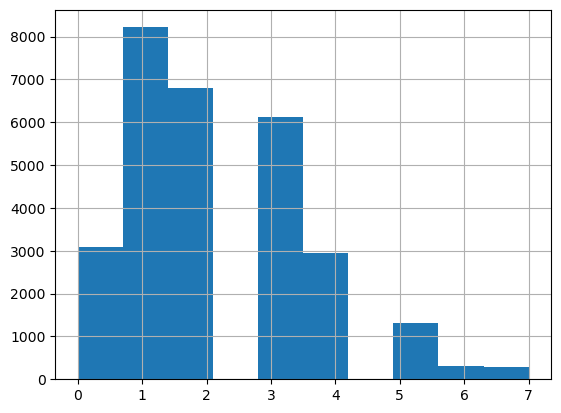

In [548]:
numericals["NrSiblings"].hist()

<Axes: >

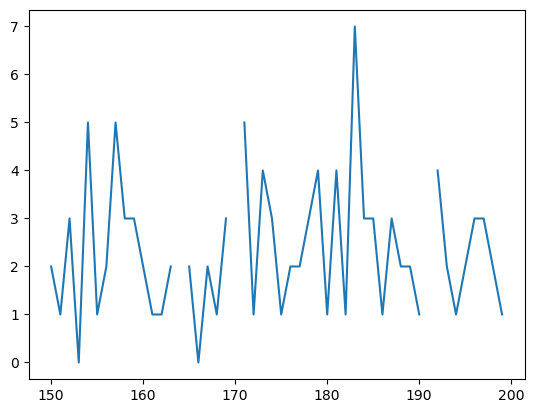

In [549]:
numericals["NrSiblings"][150:200].plot()


<Axes: >

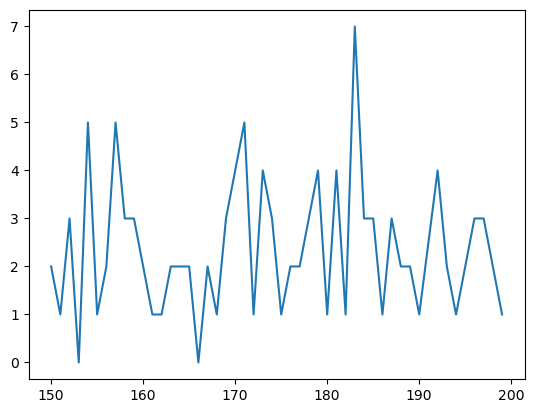

In [550]:
# miramos los metodos de interpolación
new_siblings = numericals["NrSiblings"][150:200].interpolate(method = "linear")
new_siblings.plot()


<Axes: xlabel='NrSiblings', ylabel='Count'>

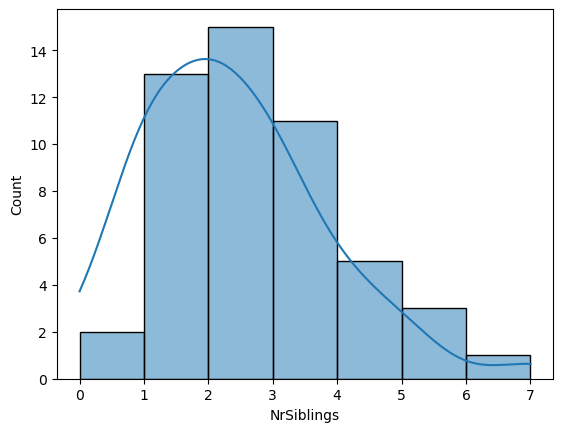

In [551]:
sns.histplot(new_siblings, kde=True)

<Axes: >

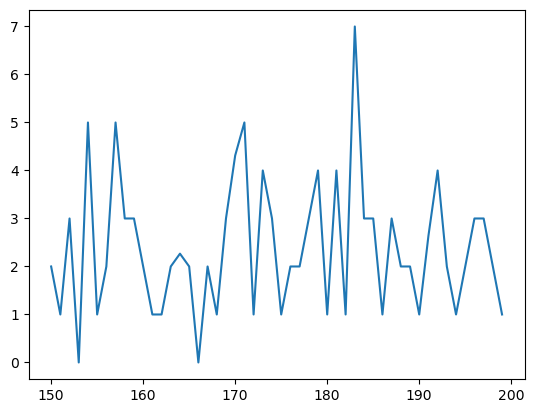

In [552]:
new_siblings = numericals["NrSiblings"][150:200].interpolate(method = "akima")
new_siblings.plot()

<Axes: xlabel='NrSiblings', ylabel='Count'>

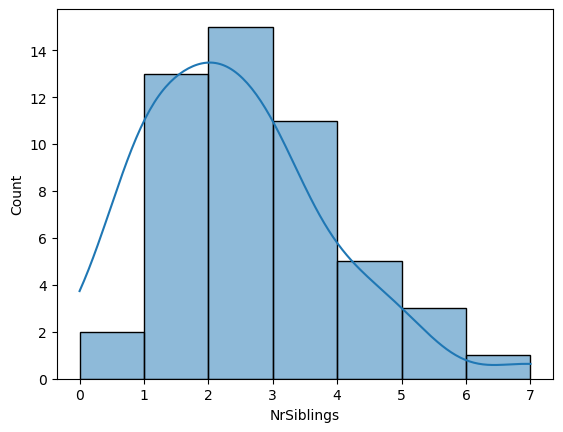

In [553]:
sns.histplot(new_siblings, kde=True)

<Axes: >

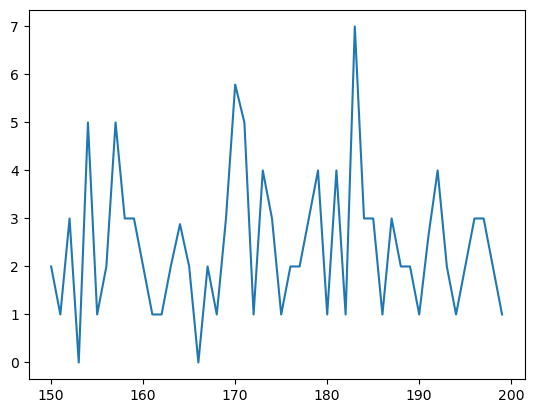

In [554]:
new_siblings = numericals["NrSiblings"][150:200].interpolate(method = "polynomial", order = 3)
new_siblings.plot()

<Axes: xlabel='NrSiblings', ylabel='Count'>

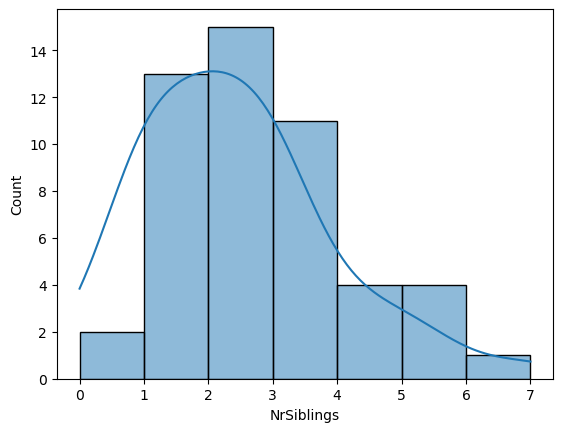

In [555]:
sns.histplot(new_siblings, kde=True)

In [556]:
# ahora cojo todo el dataframe (no solo las primeras 40 filas o las 50 de la 150-200)

<Axes: xlabel='NrSiblings', ylabel='Count'>

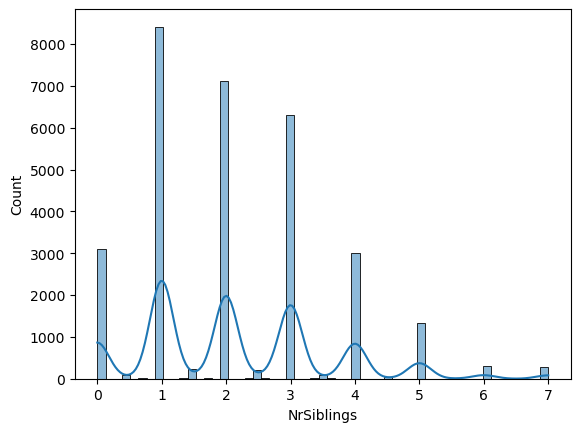

In [557]:
new_siblings= numericals["NrSiblings"].interpolate(method = "linear")
sns.histplot(new_siblings, kde=True)
# el linear me da valores float, tendré que pasarlos a int

<Axes: xlabel='NrSiblings', ylabel='Count'>

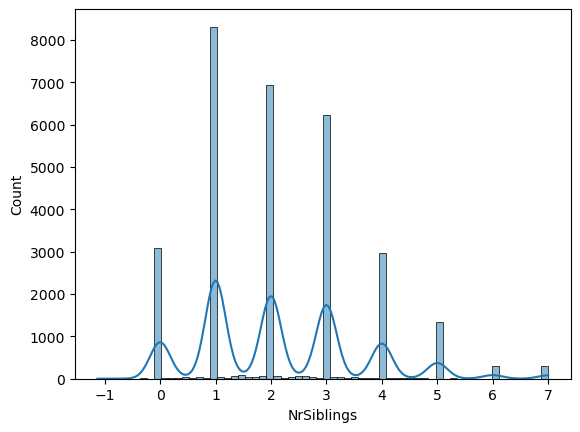

In [558]:
new_siblings= numericals["NrSiblings"].interpolate(method = "akima")
sns.histplot(new_siblings, kde=True)
# el akima tiene valores negativos

<Axes: xlabel='NrSiblings', ylabel='Count'>

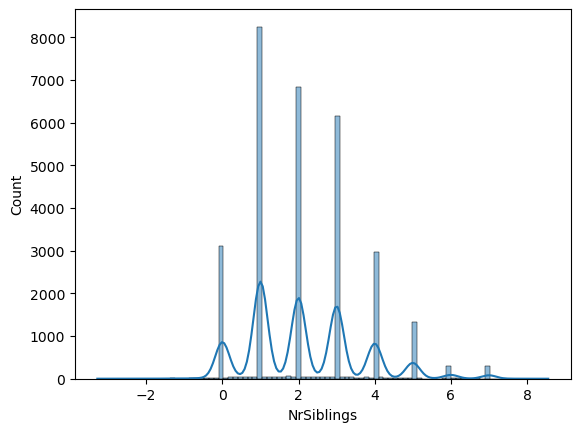

In [559]:
new_siblings= numericals["NrSiblings"].interpolate(method = "polynomial", order = 3)
sns.histplot(new_siblings, kde=True)
# el polynomial también tiene valores negativos

Si existiera alguna relación secuencial en los datos (por ejemplo, los valores más cercanos tienden a estar en una secuencia más o menos lineal), podría considerar una interpolación. 
Sin embargo, en este caso, los valores NrSiblings son enteros y discretos, lo que hace que la interpolación no es tan adecuada.

In [560]:
# ahora probamos la sustitución con la media y la mediana

<Axes: xlabel='NrSiblings', ylabel='Count'>

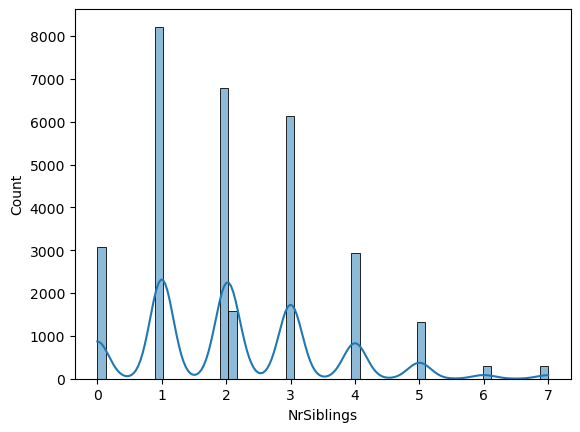

In [561]:
# media
media = numericals["NrSiblings"].fillna(np.mean(numericals["NrSiblings"]))
sns.histplot(media, kde = True)

In [562]:
media.value_counts(dropna=False)
# tiene 1572 valores que tienen 2.145 siblings...

NrSiblings
1.000000    8217
2.000000    6790
3.000000    6123
0.000000    3085
4.000000    2941
2.145894    1572
5.000000    1320
6.000000     302
7.000000     291
Name: count, dtype: int64

In [563]:
media.value_counts(normalize=True)

NrSiblings
1.000000    0.268170
2.000000    0.221599
3.000000    0.199830
0.000000    0.100682
4.000000    0.095983
2.145894    0.051304
5.000000    0.043080
6.000000    0.009856
7.000000    0.009497
Name: proportion, dtype: float64

In [564]:
#  con la mediana
mediana = numericals["NrSiblings"].median()
mediana

2.0

<Axes: xlabel='NrSiblings', ylabel='Count'>

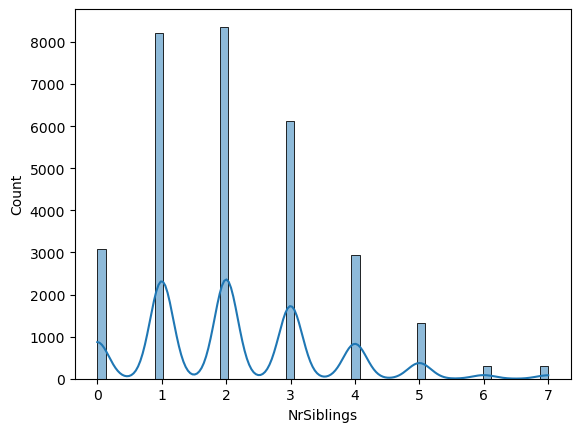

In [565]:
medianana= numericals["NrSiblings"].fillna(mediana)
sns.histplot(medianana, kde=True)

In [566]:
# no me gusta la mediana, voy a probar asignando los nulos proporcionalmente a los valores que tengo
proporciones = numericals["NrSiblings"].value_counts(dropna=False, normalize=True)
proporciones

NrSiblings
1.0    0.268170
2.0    0.221599
3.0    0.199830
0.0    0.100682
4.0    0.095983
NaN    0.051304
5.0    0.043080
6.0    0.009856
7.0    0.009497
Name: proportion, dtype: float64

In [567]:
nulls= numericals["NrSiblings"].isna().sum()
nulls

1572

In [568]:
valores_asignados = np.random.choice(proporciones.index, size=1572, p=proporciones.values)
valores_asignados

array([1., 1., 3., ..., 1., 3., 3.])

In [569]:
# asignar los valores asignados a los nulls
numericals.loc[numericals["NrSiblings"].isna(), "NrSiblings"] = valores_asignados

In [570]:
numericals["NrSiblings"].value_counts(dropna=False)

NrSiblings
1.0    8641
2.0    7131
3.0    6432
0.0    3257
4.0    3085
5.0    1388
6.0     315
7.0     306
NaN      86
Name: count, dtype: int64

In [571]:
numericals.dropna(subset=["NrSiblings"], inplace =True)

In [572]:
# convertimos a int
numericals["NrSiblings"]= numericals["NrSiblings"].astype(int)

In [573]:
numericals["NrSiblings"].value_counts(dropna=False, normalize=True)

NrSiblings
1    0.282802
2    0.233382
3    0.210506
0    0.106595
4    0.100965
5    0.045426
6    0.010309
7    0.010015
Name: proportion, dtype: float64

In [ ]:
# nos quedamos con la proporcion
# Como los valores más frecuentes en NrSiblings son 1, 2 y 3 (que aparecen con alta frecuencia), 
# la mediana sería una buena opción para reemplazar los valores nulos. 
# Dado que la mediana es menos sensible a valores extremos (como los casos de 6 y 7 hermanos), 
# es una opción robusta para mantener la tendencia central de la variable.
# sin embargo he optado por sustiuir los nulos proporcionalmente con los valores que tengo

In [575]:
numericals.head(20)

,NrSiblings,MathScore,ReadingScore,WritingScore
0,3,71,71,74
1,0,69,90,88
2,4,87,93,91
3,1,45,56,42
4,0,76,78,75
5,1,73,84,79
6,1,85,93,89
7,1,41,43,39
8,3,65,64,68
9,1,37,59,50


In [576]:
numericals["NrSiblings"].value_counts(dropna=False)

NrSiblings
1    8641
2    7131
3    6432
0    3257
4    3085
5    1388
6     315
7     306
Name: count, dtype: int64

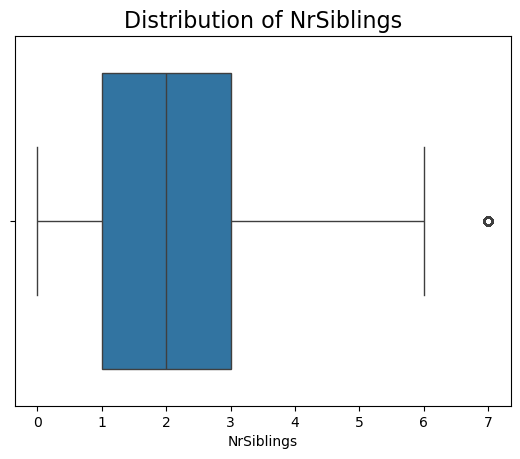

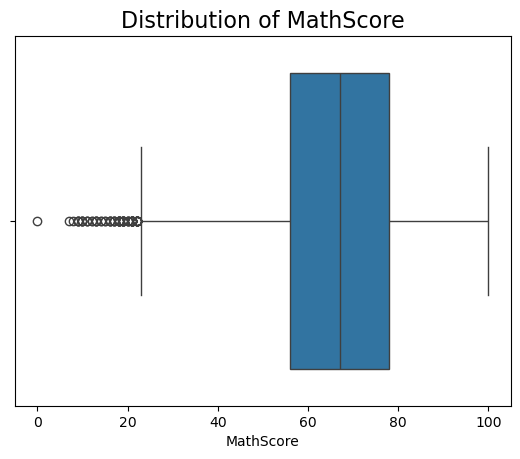

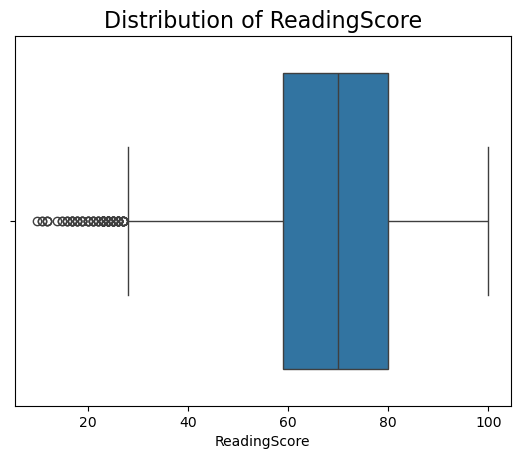

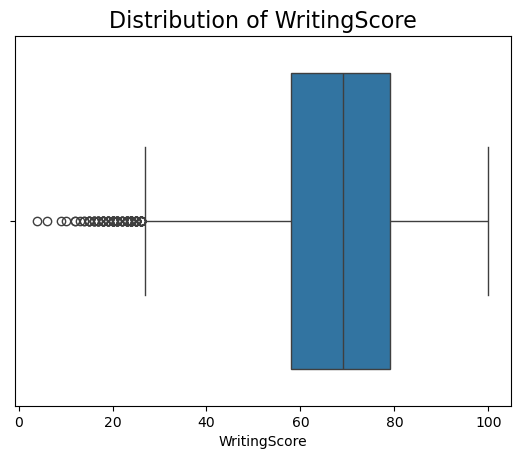

In [577]:
for i in numericals.columns:
    sns.boxplot(x=numericals[i])
    plt.title(f'Distribution of {i}', fontsize=16)
    plt.show()

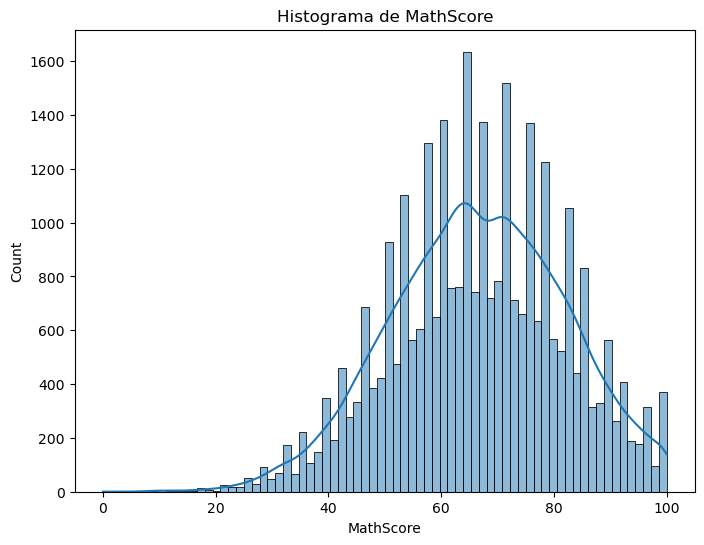

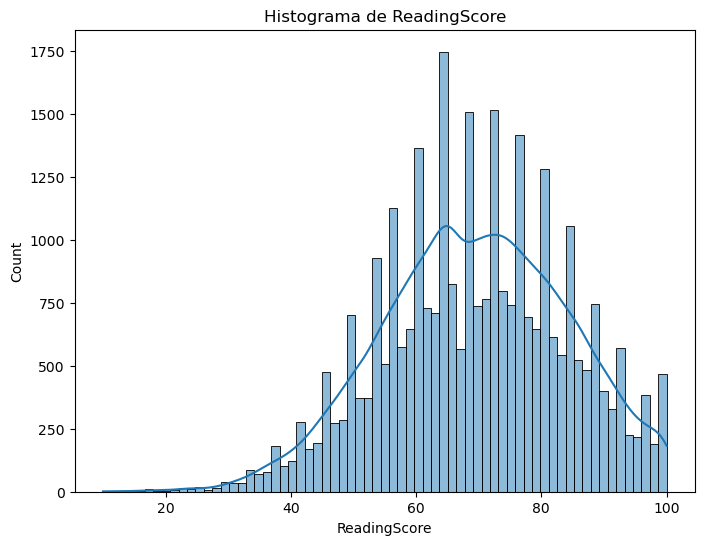

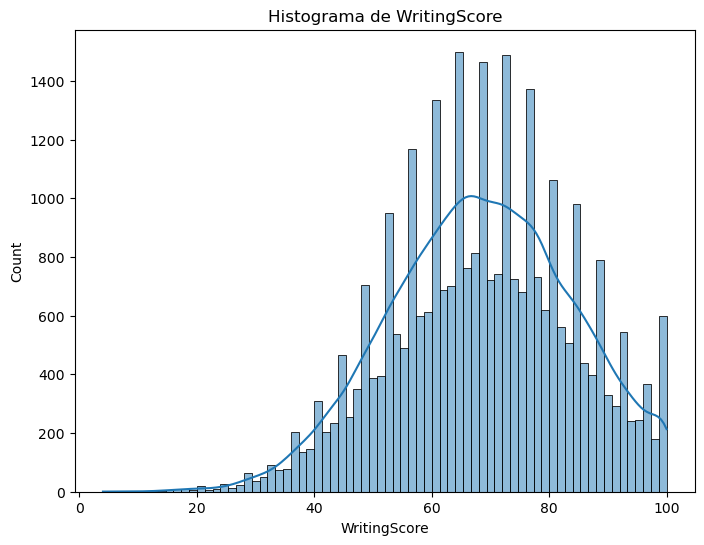

In [578]:
for i in numericals.columns:
    if i != "NrSiblings":
        plt.figure(figsize=(8, 6))
        sns.histplot(numericals[i], kde= True)
        plt.title(f'Histograma de {i}')

### Dealing with outliers

Using EDA to check the assumptions in a linear regression model para que sean solidos y robustos

- Checking normality assumption (for the residuals)
- Check skewness in the data
- Managing skewness in the data

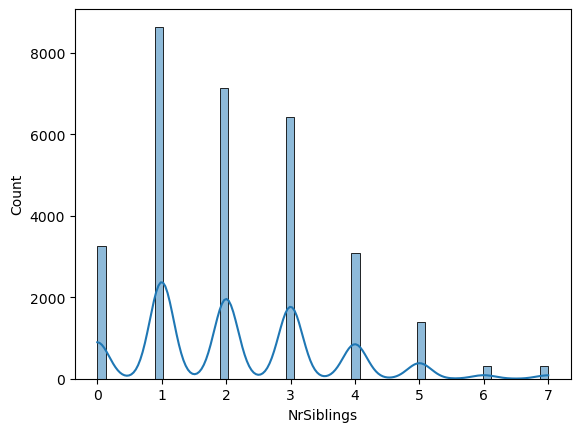

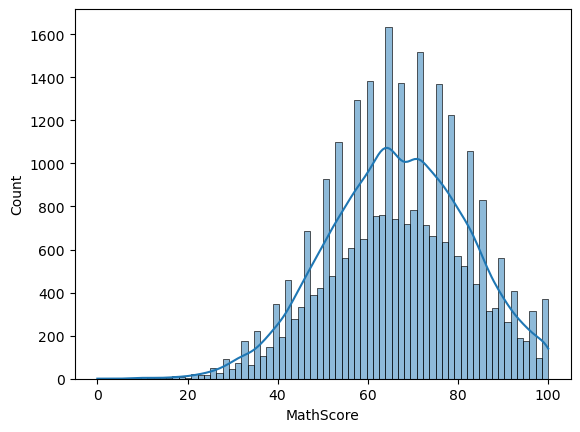

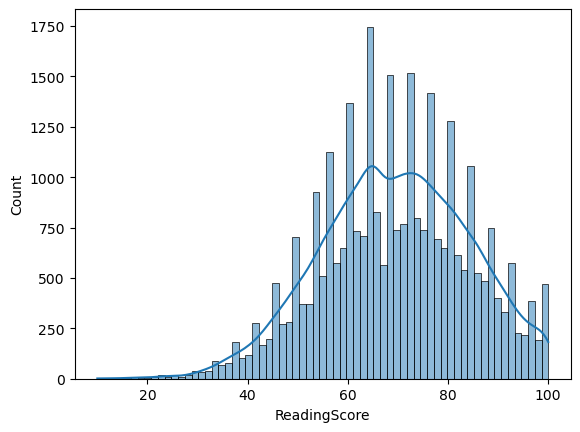

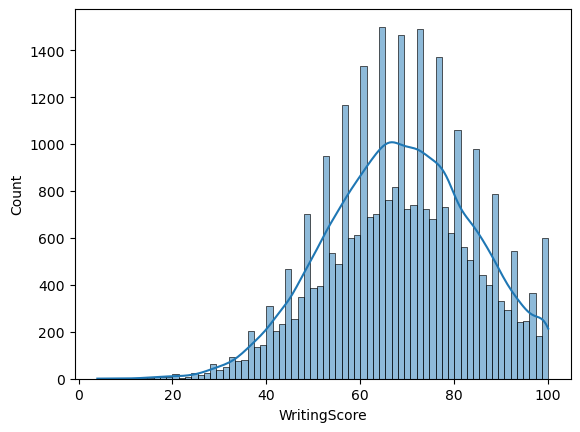

In [579]:
#chequear si nuestros datos están skewed:
for i in numericals.columns:
    sns.histplot(numericals[i], kde= True)
    plt.show()

In [ ]:
for i in numericals.columns:
    iqr =np.percentile(numericals[i], 75)-np.percentile(numericals[i], 25)
    upper_limit = np.percentile(numericals[i], 75) +1.5*iqr
    print(f"upper_limit for {i} is {upper_limit}")
    lower_limit= np.percentile(numericals[i],25)-1.5*iqr
    print(f"lower_limit for {i} is {lower_limit}")




upper_limit for NrSiblings is 6.0
lower_limit for NrSiblings is -2.0
upper_limit for MathScore is 111.0
lower_limit for MathScore is 23.0
upper_limit for ReadingScore is 111.5
lower_limit for ReadingScore is 27.5
upper_limit for WritingScore is 110.5
lower_limit for WritingScore is 26.5


In [581]:
# creamos un subset, los valores de Math, reading y writing score tienen que ser mayores que el lowerlimit
for i in numericals.columns:
    if i != "NrSiblings":
        iqr =np.percentile(numericals[i], 75)-np.percentile(numericals[i], 25)
        lower_limit= np.percentile(numericals[i],25)-1.5*iqr
        numericals= numericals[numericals[i]> lower_limit]
        print(f"El valor mínimo de {i} es {numericals[i].min()}")

El valor mínimo de MathScore es 24
El valor mínimo de ReadingScore es 28
El valor mínimo de WritingScore es 27


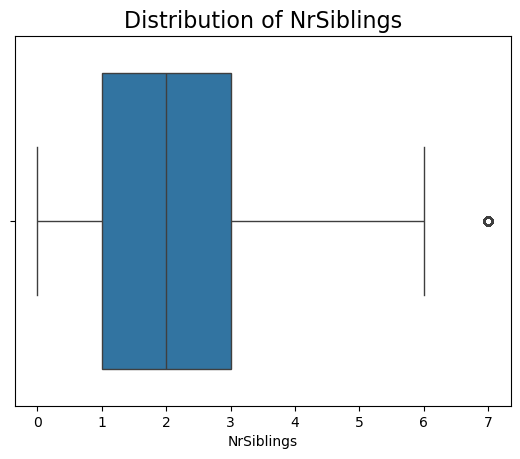

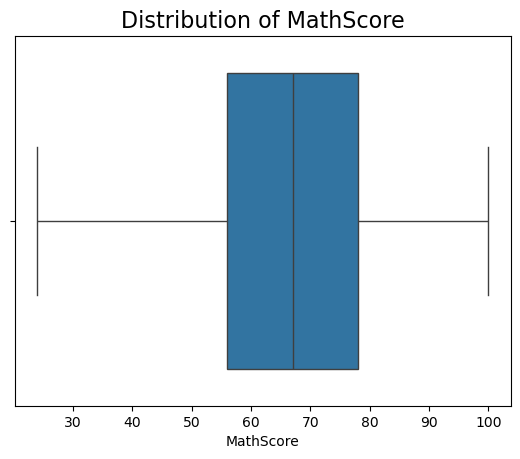

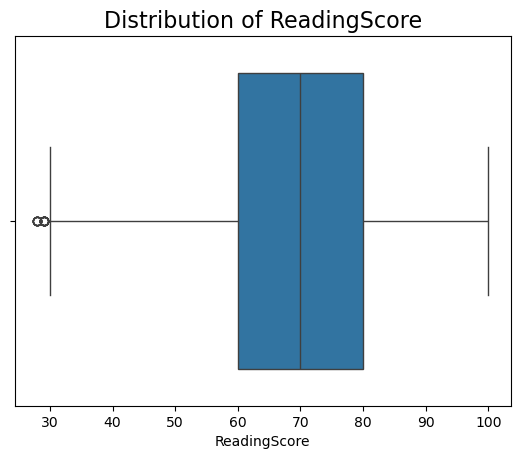

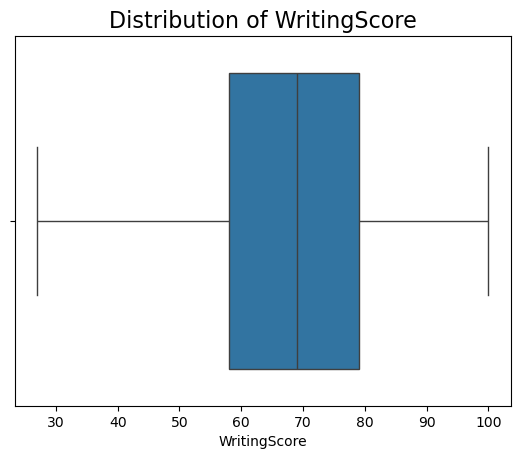

In [582]:
for i in numericals.columns:
    sns.boxplot(x=numericals[i])
    plt.title(f'Distribution of {i}', fontsize=16)
    plt.show()

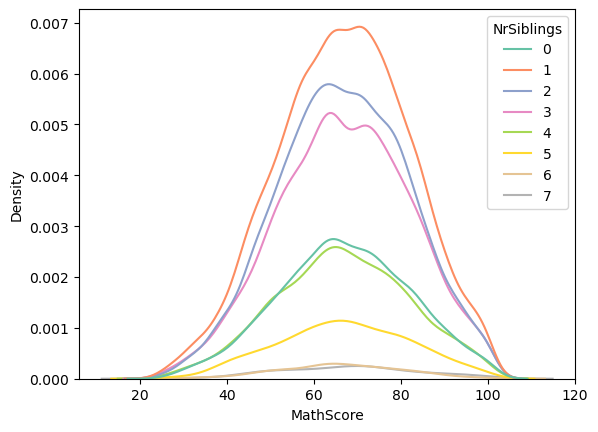

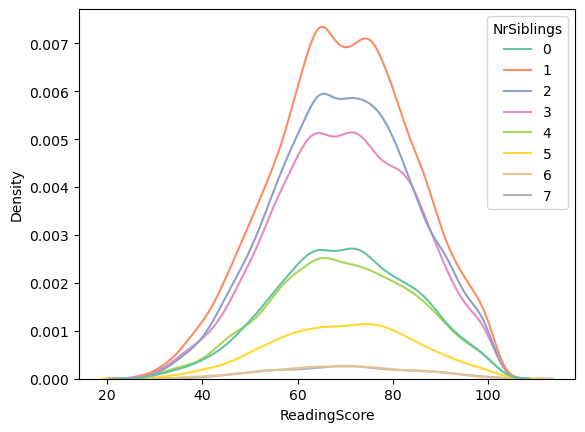

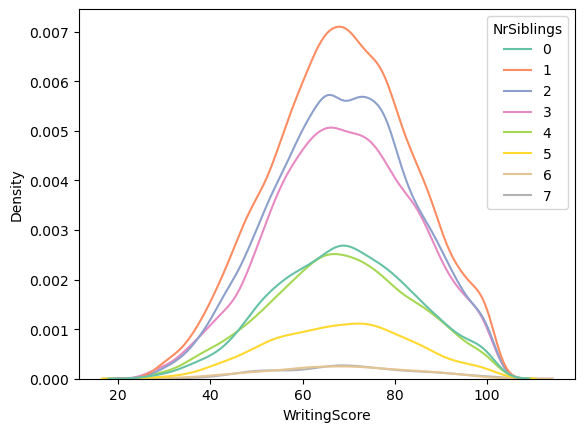

In [583]:
for i in numericals.columns:
    if i != "NrSiblings":
        sns.kdeplot(x=numericals[i], hue=numericals["NrSiblings"], palette="Set2")
        plt.show()

## box-cox

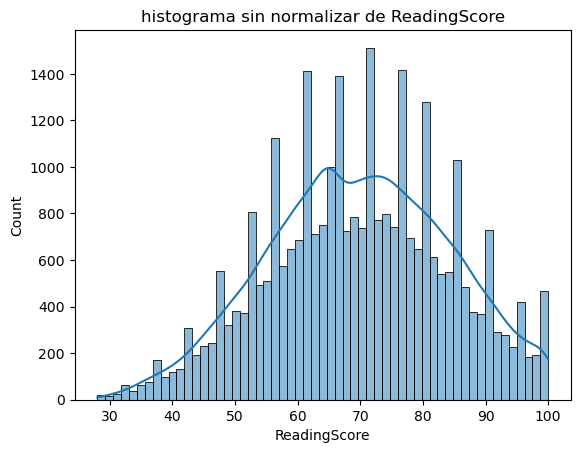

-0.09289266041750528


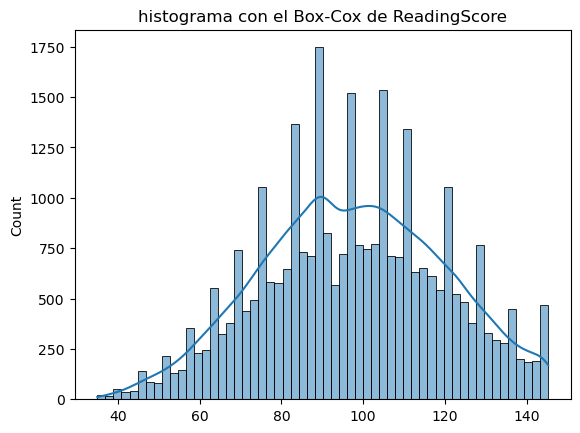

-0.041943415381567935


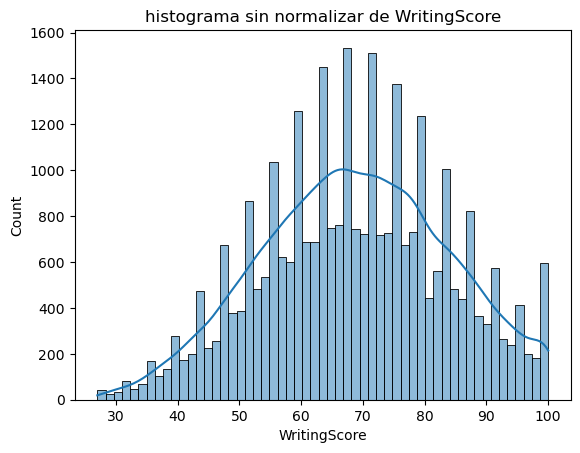

-0.0746187502514027


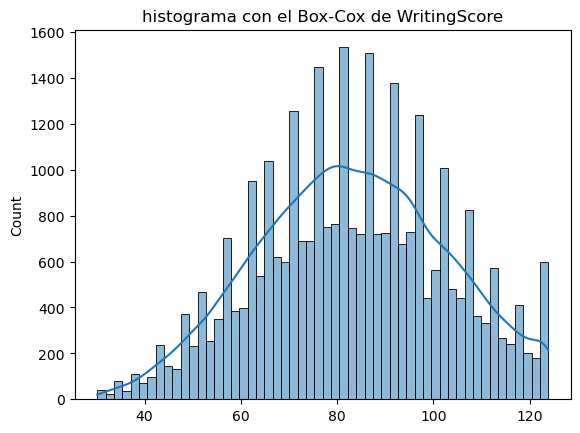

-0.04279019184875322


In [ ]:
for i in numericals.columns:
    if i != "NrSiblings" and i != "MathScore":
        sns.histplot(numericals[i], kde = True) # hist sin haber normalizado
        plt.title(f"histograma sin normalizar de {i}")
        plt.show()
        #chequeamos skewness:
        skewness = skew(numericals[i])
        print(skewness)
        
        xt, lmbda = stats.boxcox(numericals[i]) # se le pasa en 2 variables
        # xt se ha normalizado, hemos acercado los datos a una distribución normal
        sns.histplot(xt, kde = True) # hist con el box-cox
        plt.title(f"histograma con el Box-Cox de {i}")
        plt.show()
        #chequeamos skewness:
        skewness2 = skew(xt)
        print(skewness2)

# guardo el df quitando una variable con box-cox
numericals_MW_box_cox= numericals.drop(columns=["ReadingScore"], axis=1)
xt, lmbda = stats.boxcox(numericals["WritingScore"]) # se le pasa en 2 variables
numericals_MW_box_cox["WritingScore"] = xt
numericals_MW_box_cox.head()


In [585]:
# guardo el df haciendo el average con box-cox


Check multicollinearity for numerical variables using correlation:


- Create scatterplots to visually check for linear relations between the target and the different independent variables

- Create a heatmap to check for highly correlated variables

- Is colineality the best option? Multicolineality sounds cooler // NO, aumenta la variancia del modelo, el MSE

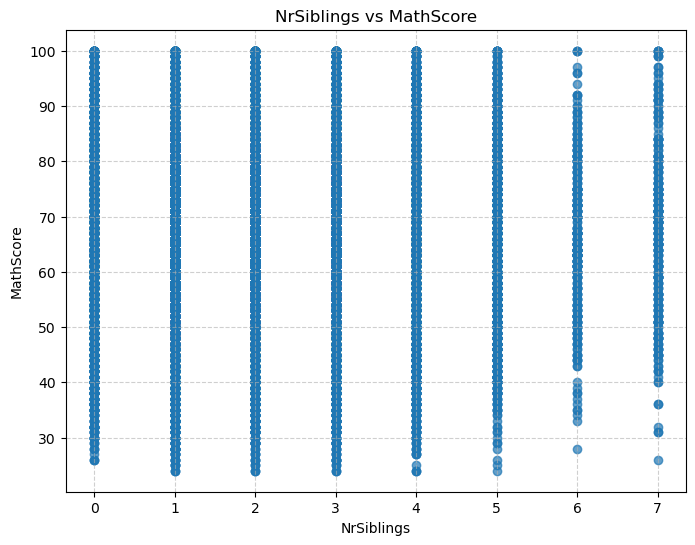

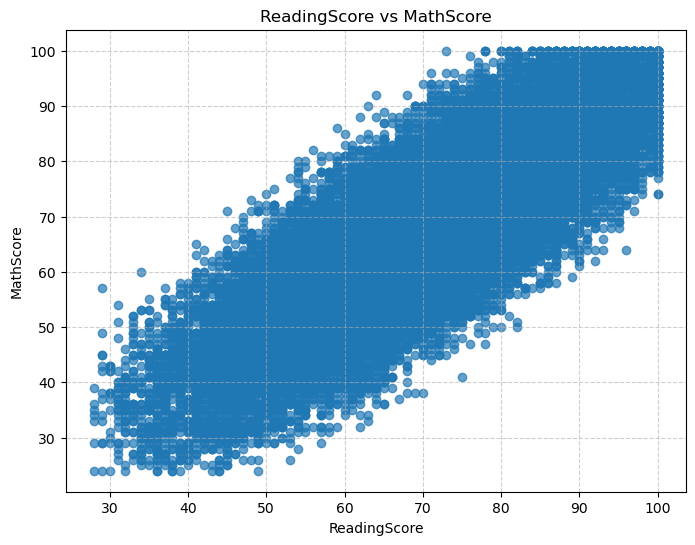

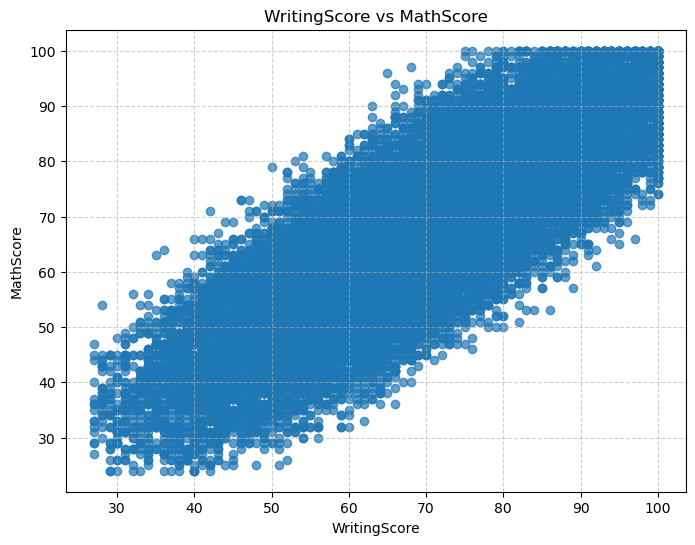

In [586]:
#Scatterplots
for column in numericals.columns:
    if column != "MathScore":
        plt.figure(figsize = (8,6))
        plt.scatter(numericals[column], numericals["MathScore"], alpha = 0.7)
        plt.xlabel (column)
        plt.ylabel("MathScore")
        plt.title(f"{column} vs MathScore")
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.show()

In [587]:
# vemos multicolinealidad (correlación muy alta) entre el readingscore y mathscore y el writing score y mathscore

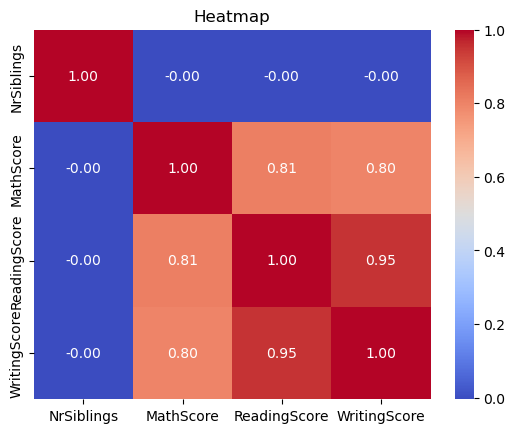

In [588]:
# matriz de correlación
corr_matrix = numericals[["NrSiblings", "MathScore", "ReadingScore", "WritingScore"]].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap")
plt.show()

vemos que no hay relación lineal entre NrSiblings y MathScore. Sin embargo, hay que tener en cuenta que correlación 0 no implica que no haya alguna relacion entre las variables, solamente que no hay relación lineal

Regresión lineal: En una regresión lineal, si hay correlación 0 entre MathScore y Number of siblings, es probable que Number of siblings no sea un buen predictor del MathScore y, por lo tanto, no tenga mucho valor en el modelo. El modelo probablemente no usará esta variable para predecir el MathScore de manera eficiente.
Modelos no lineales: En modelos como árboles de decisión, redes neuronales o incluso KNN (K-Nearest Neighbors), la correlación 0 no necesariamente significa que la variable no pueda ser útil, ya que estos modelos no requieren una relación lineal entre las variables para hacer predicciones.

por otro lado vemos que hay multicolinealidad (correlación muy alta) entre el readingscore y mathscore y el writing score y mathscore

VIF
    

Una técnica común para diagnosticar multicolinealidad es revisar el VIF (Variance Inflation Factor) de las variables. Un VIF alto indica que una variable está altamente correlacionada con otras, lo que puede ser un signo de multicolinealidad. Generalmente, un VIF mayor que 10 es un indicio de que existe multicolinealidad significativa.

In [589]:
vif_data = pd.DataFrame()
vif_data["Variables"] = numericals.columns
vif_data["VIF"] = [variance_inflation_factor(numericals.values, i) for i in range(numericals.shape[1])]

In [590]:
vif_data

,Variables,VIF
0,NrSiblings,2.908848
1,MathScore,60.032933
2,ReadingScore,254.737622
3,WritingScore,229.359142


In [591]:
def calcular_vif(data):
    """Calcula el VIF para cada variable en el DataFrame."""
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

def eliminar_variables_vif(data, umbral=10):
    """
    Elimina las variables con el mayor VIF de forma iterativa 
    hasta que todas las variables tengan un VIF inferior al umbral.
    """
    iteracion = 1
    while True:
        print(f"\n--- Iteración {iteracion} ---")
        

        vif_data = calcular_vif(data)
        print(vif_data)
        
        max_vif = vif_data["VIF"].max()
        if max_vif < umbral:
            print("\n✅ Todas las variables tienen VIF menor que", umbral)
            break
        

        variable_a_eliminar = vif_data.loc[vif_data['VIF'].idxmax(), 'Variable']
        print(f"\n⚠️ Se eliminará la variable con mayor VIF: {variable_a_eliminar} (VIF={max_vif})")
        
        data = data.drop(columns=[variable_a_eliminar])
        
        iteracion += 1
        
    print("\n📊 Proceso finalizado. Variables restantes:")
    print(data.columns)
    return data, vif_data

numericals_final, vif_final = eliminar_variables_vif(numericals, umbral=10)


--- Iteración 1 ---
       Variable         VIF
0    NrSiblings    2.908848
1     MathScore   60.032933
2  ReadingScore  254.737622
3  WritingScore  229.359142

⚠️ Se eliminará la variable con mayor VIF: ReadingScore (VIF=254.7376221640926)

--- Iteración 2 ---
       Variable        VIF
0    NrSiblings   2.890021
1     MathScore  53.383829
2  WritingScore  53.532386

⚠️ Se eliminará la variable con mayor VIF: WritingScore (VIF=53.53238581082593)

--- Iteración 3 ---
     Variable       VIF
0  NrSiblings  2.860224
1   MathScore  2.860224

✅ Todas las variables tienen VIF menor que 10

📊 Proceso finalizado. Variables restantes:
Index(['NrSiblings', 'MathScore'], dtype='object')


In [592]:
numericals_final # como hemos visto con el VIF podemos eliminar las columnas de ReadingScore y WritingScore

,NrSiblings,MathScore
0,3,71
1,0,69
2,4,87
3,1,45
4,0,76
...,...,...
30636,2,59
30637,1,58
30638,1,61
30639,3,82


## VARIABLES CATEGORICAS

In [593]:
categoricals=df.select_dtypes(object)
categoricals.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,TransportMeans,WklyStudyHours
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,school_bus,< 5
1,female,group C,some college,standard,NaN,married,sometimes,yes,NaN,5 - 10
2,female,group B,master's degree,standard,none,single,sometimes,yes,school_bus,< 5
3,male,group A,associate's degree,free/reduced,none,married,never,no,NaN,5 - 10
4,male,group C,some college,standard,none,married,sometimes,yes,school_bus,5 - 10


In [594]:
categoricals.isna().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
TransportMeans         3134
WklyStudyHours          955
dtype: int64

In [595]:
# miramos los nulos
categoricals.isna().sum()/len(categoricals)*100

Gender                  0.000000
EthnicGroup             6.005026
ParentEduc              6.021344
LunchType               0.000000
TestPrep                5.972390
ParentMaritalStatus     3.883685
PracticeSport           2.059332
IsFirstChild            2.950295
TransportMeans         10.228126
WklyStudyHours          3.116739
dtype: float64

In [596]:
categoricals.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               30641 non-null  object
 1   EthnicGroup          28801 non-null  object
 2   ParentEduc           28796 non-null  object
 3   LunchType            30641 non-null  object
 4   TestPrep             28811 non-null  object
 5   ParentMaritalStatus  29451 non-null  object
 6   PracticeSport        30010 non-null  object
 7   IsFirstChild         29737 non-null  object
 8   TransportMeans       27507 non-null  object
 9   WklyStudyHours       29686 non-null  object
dtypes: object(10)
memory usage: 2.3+ MB


## GENDER ANALYSIS

In [597]:
categoricals.Gender.value_counts(dropna=False)

Gender
female    15424
male      15217
Name: count, dtype: int64

In [598]:
# tiene sentido esta variable?? 
df[["Gender", "MathScore"]].groupby(by="Gender").mean()
# yo creo que sí

,MathScore
Gender,
female,64.080654
male,69.069856


<Axes: xlabel='Gender', ylabel='MathScore'>

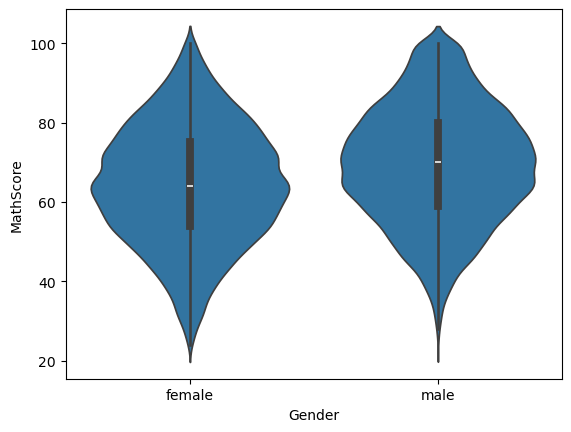

In [599]:
sns.violinplot(x=categoricals["Gender"], y=numericals_final["MathScore"])

In [600]:
numericals_final["MathScore"].max()

100

<Axes: xlabel='NrSiblings', ylabel='MathScore'>

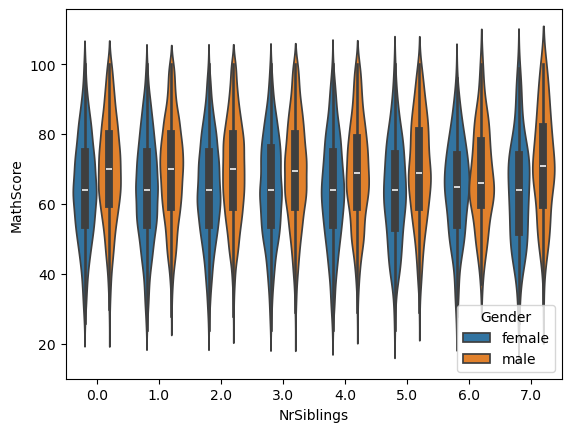

In [601]:
sns.violinplot(x=numericals_final["NrSiblings"], y=numericals_final["MathScore"], hue=categoricals["Gender"])

<Axes: xlabel='Gender', ylabel='MathScore'>

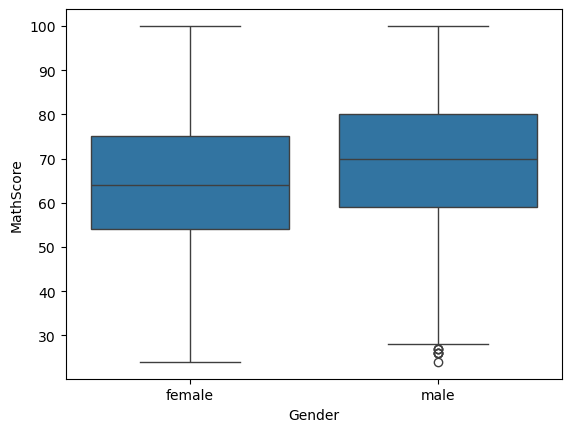

In [602]:
sns.boxplot(x=categoricals["Gender"], y=numericals_final["MathScore"])

<Axes: xlabel='NrSiblings', ylabel='MathScore'>

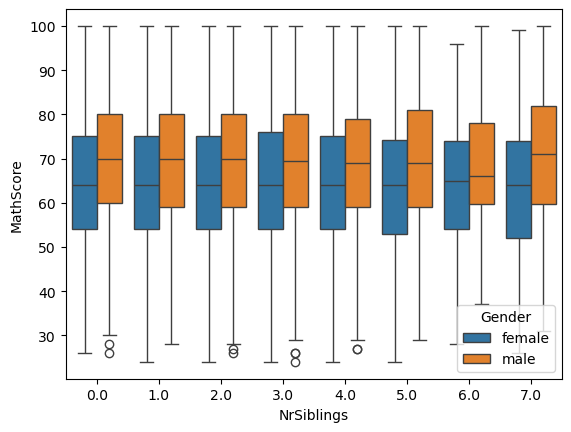

In [603]:
sns.boxplot(x=numericals_final["NrSiblings"], y=numericals_final["MathScore"], hue=categoricals["Gender"])

<Axes: xlabel='MathScore', ylabel='Count'>

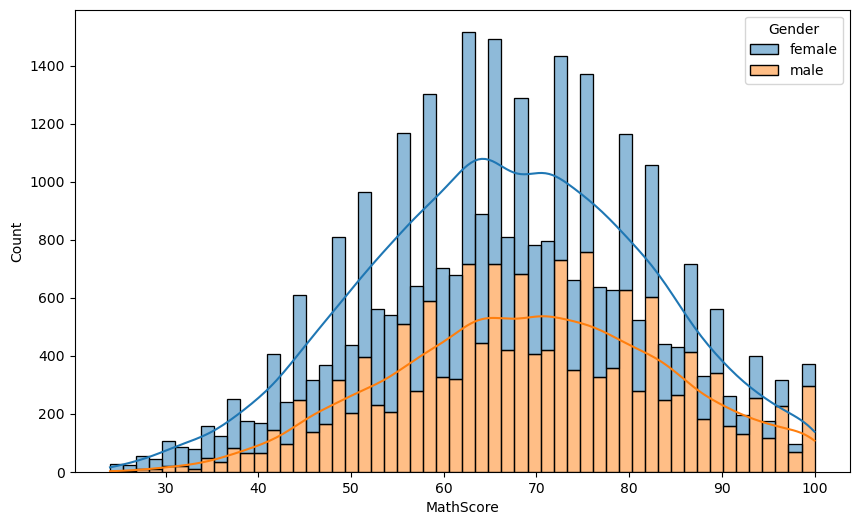

In [604]:
plt.figure(figsize=(10,6)) # si tiene sentido el genero en la nota de math score
sns.histplot(x=numericals_final["MathScore"], hue=categoricals["Gender"], kde=True, multiple="stack") # yo creo que sí

## ETHNIC GROUP ANALYSIS

In [605]:
categoricals["EthnicGroup"].value_counts(dropna=False)

EthnicGroup
group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
NaN        1840
Name: count, dtype: int64

In [606]:
# vemos la importancia que tiene la etnia
avg_mathscore = df.groupby("EthnicGroup")["MathScore"].mean()
avg_mathscore.sort_values(ascending=False)

EthnicGroup
group E    75.298936
group D    67.666400
group C    64.695723
group B    63.490216
group A    62.991888
Name: MathScore, dtype: float64

In [607]:
orderethnicity = ["group A", "group B", "group C", "group D", "group E"]

<Axes: xlabel='EthnicGroup', ylabel='MathScore'>

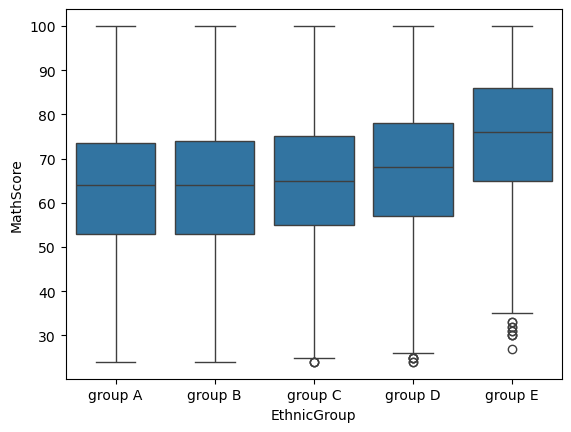

In [608]:
sns.boxplot(x=categoricals["EthnicGroup"], y=numericals_final["MathScore"], order = orderethnicity)

<Axes: xlabel='EthnicGroup', ylabel='MathScore'>

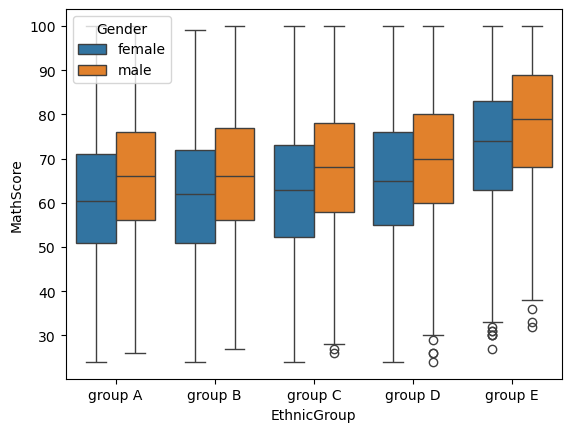

In [609]:
sns.boxplot(x=categoricals["EthnicGroup"], y=numericals_final["MathScore"], hue=categoricals["Gender"], order = orderethnicity)

<Axes: xlabel='NrSiblings', ylabel='MathScore'>

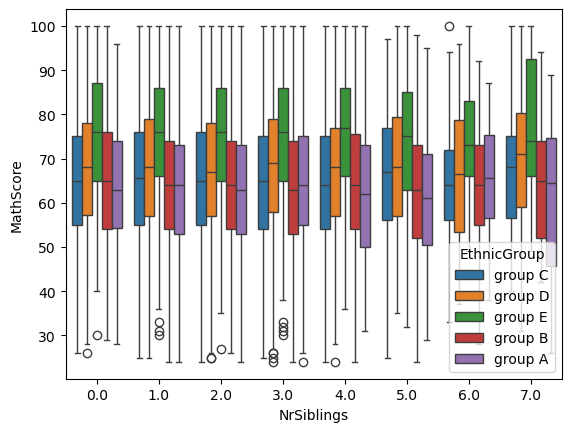

In [610]:
sns.boxplot(x=numericals_final["NrSiblings"], y=numericals_final["MathScore"], hue=categoricals["EthnicGroup"])

In [611]:
# no quiero trabajar con los nulos así que sustituyo los nulls por el valor más frequente
valor_freq= categoricals["EthnicGroup"].mode()[0]
valor_freq

'group C'

In [612]:
categoricals["EthnicGroup"].fillna(valor_freq, inplace=True)

/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_4269/1127797644.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  categoricals["EthnicGroup"].fillna(valor_freq, inplace=True)


In [613]:
categoricals["EthnicGroup"].value_counts(dropna=False)

EthnicGroup
group C    11052
group D     7503
group B     5826
group E     4041
group A     2219
Name: count, dtype: int64

<Axes: xlabel='EthnicGroup', ylabel='MathScore'>

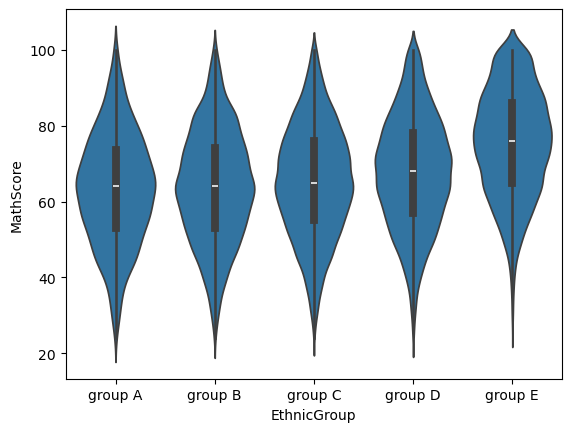

In [614]:
sns.violinplot(x=categoricals["EthnicGroup"], y=numericals_final["MathScore"], order = orderethnicity)

In [615]:
#categoricals2["EthnicGroup"].value_counts(dropna=False)

In [616]:
#categoricals2.dropna(subset = ["EthnicGroup"], inplace= True)

In [617]:
#categoricals2.info()

## PARENT EDUCATION

In [618]:
categoricals["ParentEduc"].value_counts(dropna=False)
# 1845 nulls

ParentEduc
some college          6633
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
NaN                   1845
Name: count, dtype: int64

In [619]:
categoricals["ParentEduc"] = categoricals["ParentEduc"].replace({"some high school": "high school", "some college": "college"})


In [620]:
categoricals["ParentEduc"].value_counts(dropna=False)

ParentEduc
high school           11204
college                6633
associate's degree     5550
bachelor's degree      3386
master's degree        2023
NaN                    1845
Name: count, dtype: int64

In [621]:
# que hago con los nulos??
# o los elimino o los distribuyo proporcionalmente
# Calcular las proporciones de cada categoría (sin los NaN)
proporciones = (categoricals['ParentEduc'].value_counts(dropna=True)) / (categoricals['ParentEduc'].value_counts(dropna=True).sum())
proporciones

ParentEduc
high school           0.389082
college               0.230344
associate's degree    0.192735
bachelor's degree     0.117586
master's degree       0.070253
Name: count, dtype: float64

In [622]:
# Distribuir los Nulls proporcionalmente entre las categorías
nulls = categoricals['ParentEduc'].isna().sum()
nulls


1845

In [623]:
nulls_distribution= np.random.choice(proporciones.index, size=nulls, p=proporciones.values)
nulls_distribution

array(["master's degree", 'college', 'college', ..., 'college', 'college',
       'college'], dtype=object)

In [624]:
# Reemplazar los NaNs con los valores distribuidos
categoricals.loc[categoricals['ParentEduc'].isna(), "ParentEduc"] = nulls_distribution
categoricals["ParentEduc"].value_counts(dropna=False)

ParentEduc
high school           11909
college                7071
associate's degree     5904
bachelor's degree      3594
master's degree        2163
Name: count, dtype: int64

In [625]:
ordereduc =["high school", "college", "associate's degree", "bachelor's degree", "master's degree"]

([0, 1, 2, 3, 4],
 [Text(0, 0, 'high school'),
  Text(1, 0, 'college'),
  Text(2, 0, "associate's degree"),
  Text(3, 0, "bachelor's degree"),
  Text(4, 0, "master's degree")])

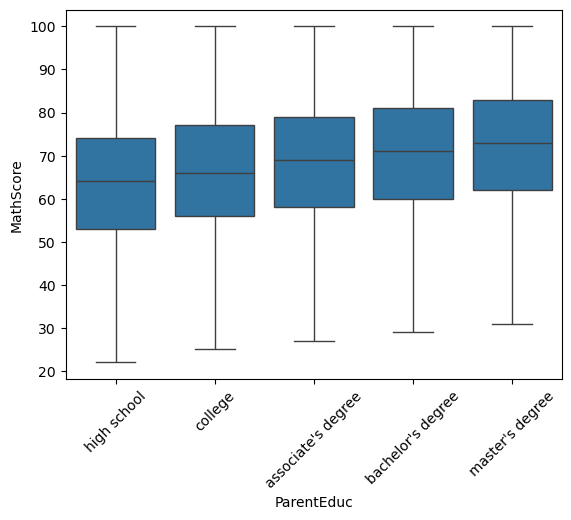

In [626]:
sns.boxplot(x=categoricals["ParentEduc"], y="MathScore", data=df, order = ordereduc, showfliers = False)
plt.xticks(rotation=45)

When it comes to the students' test scores, there seems to be a clear correlation with their parents(s) educational background. Children of highly educated parents score better than the children of less educated parents. 

# graficos

## LUNCH TYPE

In [627]:
categoricals["LunchType"].value_counts(dropna=False)

LunchType
standard        19905
free/reduced    10736
Name: count, dtype: int64

<Axes: xlabel='MathScore', ylabel='Count'>

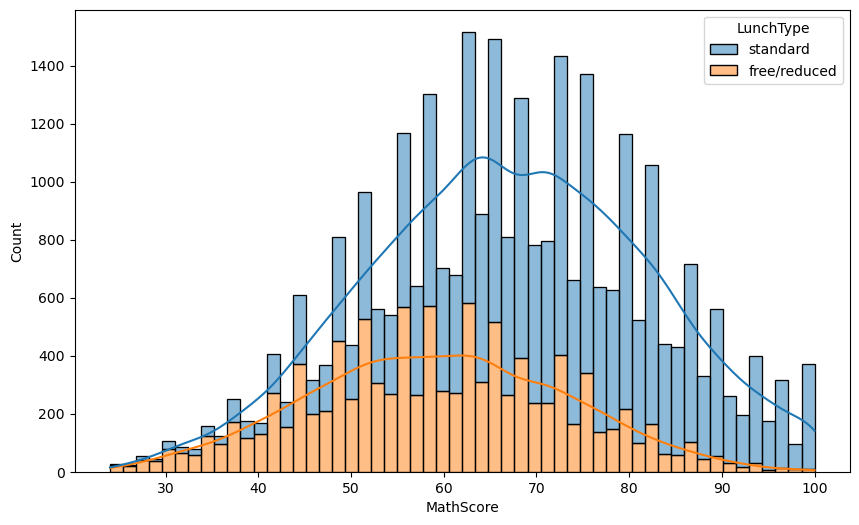

In [628]:
plt.figure(figsize=(10,6)) # si tiene sentido el lunchtype en la nota de math score
sns.histplot(x=numericals_final["MathScore"], hue=categoricals["LunchType"], kde=True, multiple="stack") # yo creo que sí

In [629]:
avg_score = df.groupby("LunchType")[["MathScore", "ReadingScore", "WritingScore"]].mean()
avg_score.sort_values(by = ["MathScore"], ascending=False)
# parece ser que afecta al mathscore

,MathScore,ReadingScore,WritingScore
LunchType,,,
standard,70.709370,72.175634,71.529716
free/reduced,58.862332,64.189735,62.650522


Si deseas comprobar si la variable LunchType depende significativamente de ParentEduc, 
puedes realizar un test de chi-cuadrado. 
El test de chi-cuadrado te permitirá verificar si la distribución de LunchType entre los diferentes niveles de educación de los padres 
es aleatoria o si hay una dependencia significativa.

In [630]:
# quiero ver si tiene importancia esta variable
cross_tab = pd.crosstab(index = categoricals["ParentEduc"], columns = categoricals["LunchType"], margins = True, margins_name= "Total")
cross_tab

LunchType,free/reduced,standard,Total
ParentEduc,,,
associate's degree,2103,3801,5904
bachelor's degree,1258,2336,3594
college,2425,4646,7071
high school,4161,7748,11909
master's degree,789,1374,2163
Total,10736,19905,30641


In [631]:
# 1/3 tienen reduced y 2/3 tienen standard, 
# independientemente del parenteduc, pero sí hay diferencia en los resultados de las notas

Valor p del test de chi-cuadrado: 0.3292822466602732


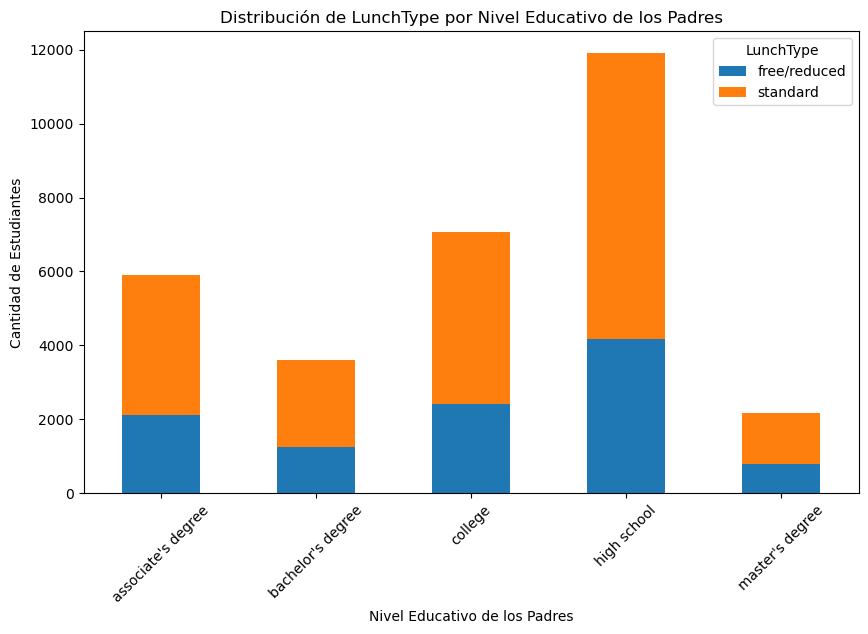

In [632]:
from scipy.stats import chi2_contingency

# Crear la tabla de contingencia
contingency_table = pd.crosstab(categoricals["ParentEduc"], categoricals["LunchType"])

# Realizar el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table) # en crosstab están los totales...

print(f"Valor p del test de chi-cuadrado: {p}")

# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Distribución de LunchType por Nivel Educativo de los Padres')
plt.ylabel('Cantidad de Estudiantes')
plt.xlabel('Nivel Educativo de los Padres')
plt.xticks(rotation=45)
plt.show()

In [633]:
# Si el valor p es menor que un umbral común como 0.05, 
# podrías concluir que hay una relación significativa entre el tipo de almuerzo (LunchType) y el nivel educativo de los padres (ParentEduc).
# me quedo con la variable

Valor p del test de chi-cuadrado: 0.1934322859046928


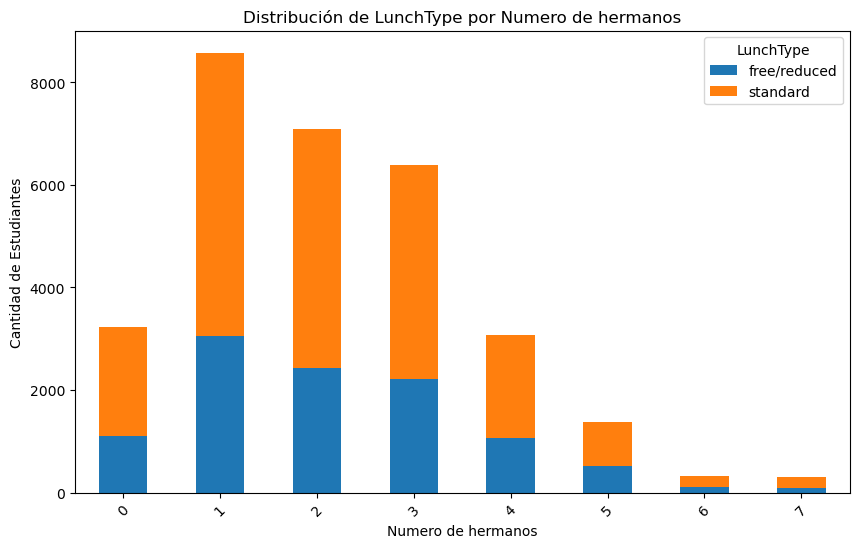

In [634]:
from scipy.stats import chi2_contingency

# Crear la tabla de contingencia
contingency_table = pd.crosstab(numericals_final["NrSiblings"], categoricals["LunchType"])

# Realizar el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table) # en crosstab están los totales...

print(f"Valor p del test de chi-cuadrado: {p}")
# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Distribución de LunchType por Numero de hermanos')
plt.ylabel('Cantidad de Estudiantes')
plt.xlabel('Numero de hermanos')
plt.xticks(rotation=45)
plt.show()

## TEST PREP

In [635]:
categoricals["TestPrep"].value_counts(dropna=False)

TestPrep
none         18856
completed     9955
NaN           1830
Name: count, dtype: int64

In [636]:
avg_score = df.groupby("TestPrep")[["MathScore", "ReadingScore", "WritingScore"]].mean()
avg_score.sort_values(by = ["MathScore"], ascending=False)

,MathScore,ReadingScore,WritingScore
TestPrep,,,
completed,69.54666,73.732998,74.703265
none,64.94877,67.051071,65.092756


<Axes: xlabel='MathScore', ylabel='Count'>

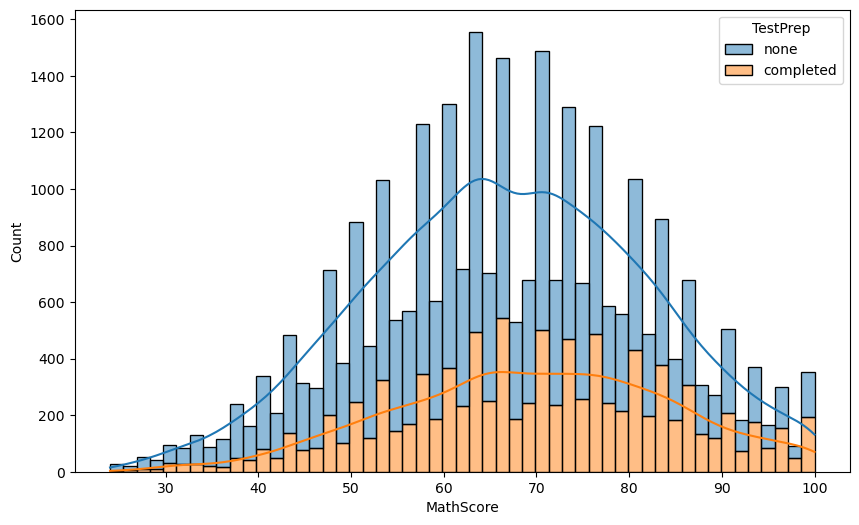

In [637]:
plt.figure(figsize=(10,6)) # si tiene sentido el testprep en la nota de math score
sns.histplot(x=numericals_final["MathScore"], hue=categoricals["TestPrep"], kde=True, multiple="stack") # yo creo que sí

In [638]:
df["TestPrep"].mode()[0]

'none'

In [639]:
# los nulos los sustituyo por la moda
categoricals["TestPrep"].fillna(categoricals["TestPrep"].mode()[0], inplace=True)
avg_mathscore = df.groupby("TestPrep")["MathScore"].mean()
avg_mathscore.sort_values(ascending=False)

/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_4269/1739486922.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  categoricals["TestPrep"].fillna(categoricals["TestPrep"].mode()[0], inplace=True)


TestPrep
completed    69.54666
none         64.94877
Name: MathScore, dtype: float64

In [640]:
# quiero ver si tiene importancia esta variable
cross_tab = pd.crosstab(index = categoricals["ParentEduc"], columns = categoricals["TestPrep"], margins = True, margins_name= "Total")
cross_tab 

TestPrep,completed,none,Total
ParentEduc,,,
associate's degree,1910,3994,5904
bachelor's degree,1171,2423,3594
college,2346,4725,7071
high school,3835,8074,11909
master's degree,693,1470,2163
Total,9955,20686,30641


Valor p del test de chi-cuadrado: 0.6916627060921867


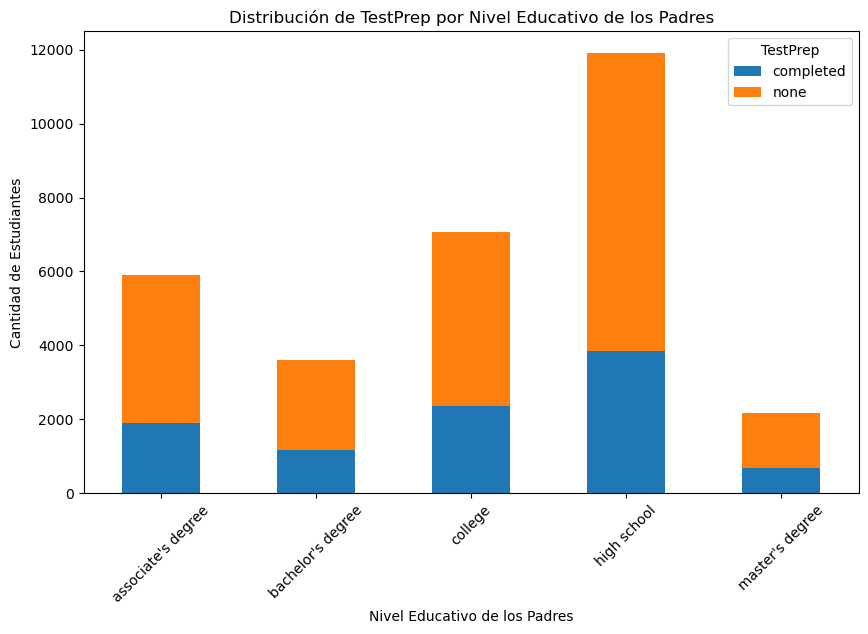

In [641]:
contingency_table = pd.crosstab(categoricals["ParentEduc"], categoricals["TestPrep"])

# Realizar el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table) # en crosstab están los totales...

print(f"Valor p del test de chi-cuadrado: {p}")

# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Distribución de TestPrep por Nivel Educativo de los Padres')
plt.ylabel('Cantidad de Estudiantes')
plt.xlabel('Nivel Educativo de los Padres')
plt.xticks(rotation=45)
plt.show()

Valor p del test de chi-cuadrado: 0.23358418571007558


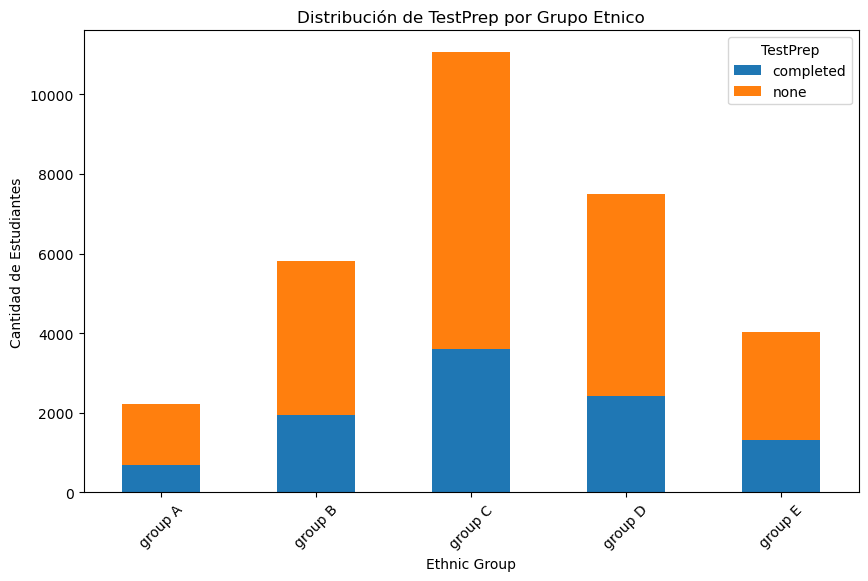

In [642]:
contingency_table = pd.crosstab(categoricals["EthnicGroup"], categoricals["TestPrep"])

# Realizar el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table) # en crosstab están los totales...

print(f"Valor p del test de chi-cuadrado: {p}")

# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Distribución de TestPrep por Grupo Etnico')
plt.ylabel('Cantidad de Estudiantes')
plt.xlabel('Ethnic Group')
plt.xticks(rotation=45)
plt.show()

## PARENT MARITAL STATUS

In [643]:
categoricals["ParentMaritalStatus"].value_counts(dropna=False)

ParentMaritalStatus
married     16844
single       7097
divorced     4919
NaN          1190
widowed       591
Name: count, dtype: int64

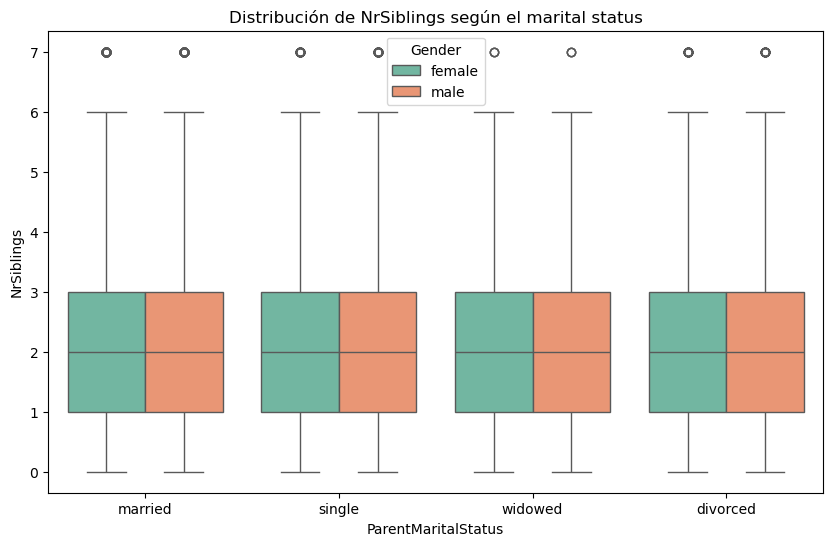

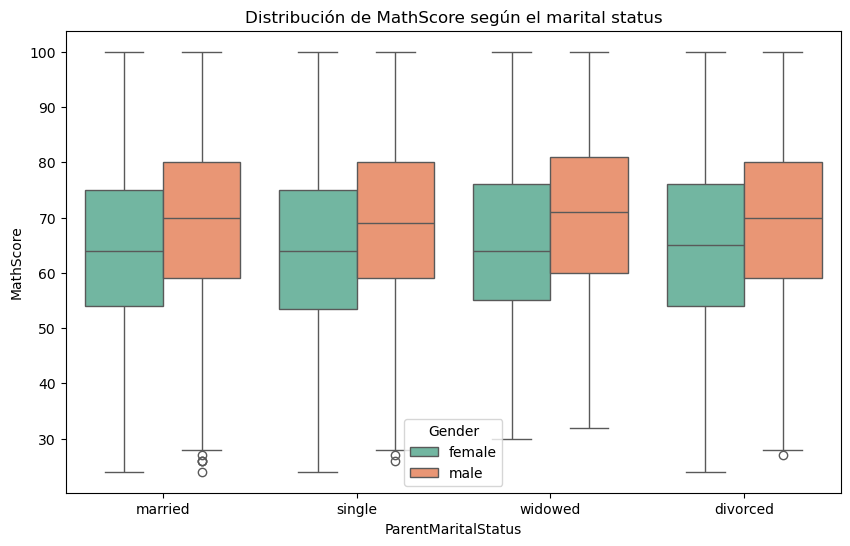

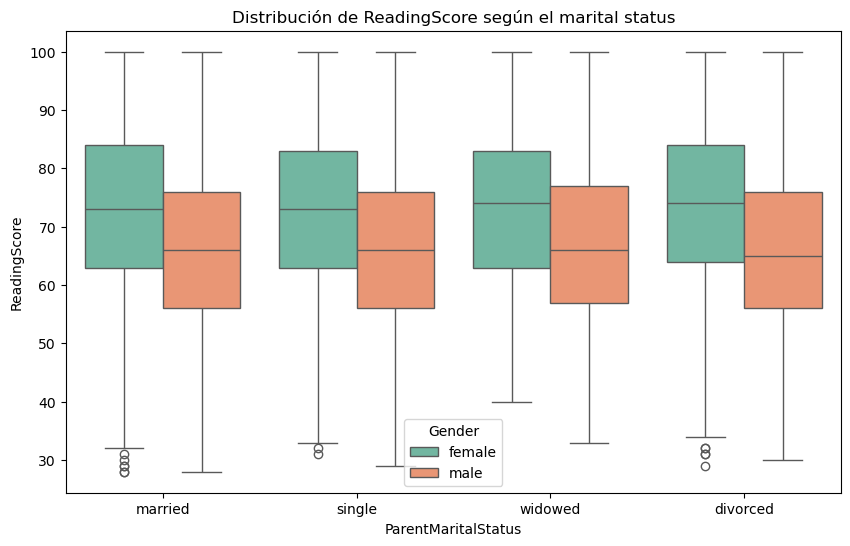

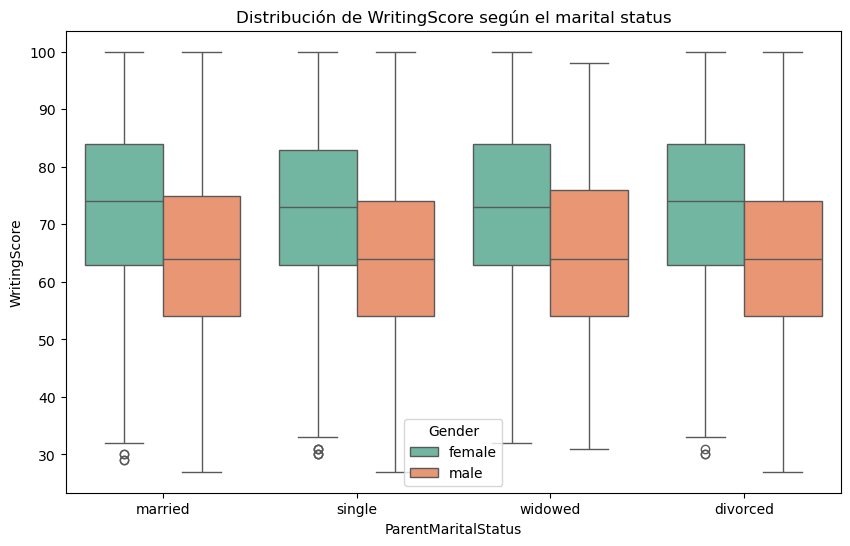

In [644]:
for i in numericals.columns:
    plt.figure(figsize=(10,6))  
    sns.boxplot(x=categoricals["ParentMaritalStatus"], y=numericals[i], hue = categoricals["Gender"], palette="Set2")
    plt.title(f"Distribución de {i} según el marital status")

/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_4269/473717904.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='ParentMaritalStatus', y='MathScore', data=df, palette='Set2')


<Axes: xlabel='ParentMaritalStatus', ylabel='MathScore'>

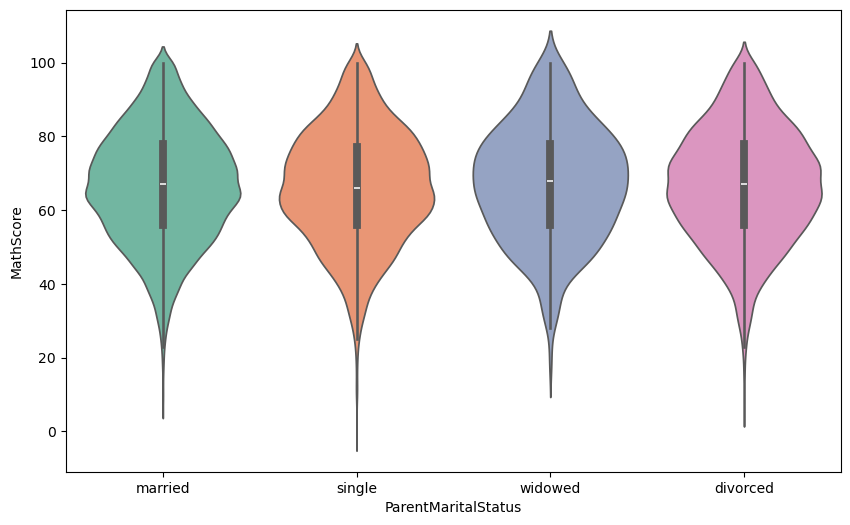

In [645]:
plt.figure(figsize=(10,6))
sns.violinplot(x='ParentMaritalStatus', y='MathScore', data=df, palette='Set2')

In [646]:
# This features seem to have little to no correlation with test scores.
# yo la eliminaría

## PRACTICE SPORT

In [647]:
categoricals["PracticeSport"].value_counts(dropna=False)

PracticeSport
sometimes    15213
regularly    10793
never         4004
NaN            631
Name: count, dtype: int64

In [648]:
# sustituyo los nulos por la moda
categoricals["PracticeSport"].fillna(categoricals["PracticeSport"].mode()[0], inplace=True)
avg_mathscore = df.groupby("PracticeSport")["MathScore"].mean()
avg_mathscore.sort_values(ascending=False)

/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_4269/1915170260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  categoricals["PracticeSport"].fillna(categoricals["PracticeSport"].mode()[0], inplace=True)


PracticeSport
regularly    67.839155
sometimes    66.274831
never        64.171079
Name: MathScore, dtype: float64

In [649]:
avg_score = df.groupby("PracticeSport")[["MathScore", "ReadingScore", "WritingScore"]].mean()
avg_score.sort_values(by = ["MathScore"], ascending=False)

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438
never,64.171079,68.337662,66.522727


/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_4269/2035824710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categoricals["PracticeSport"], y=numericals_final['MathScore'], palette='Set2')


Text(0.5, 1.0, 'Relación entre PracticeSport y MathScore')

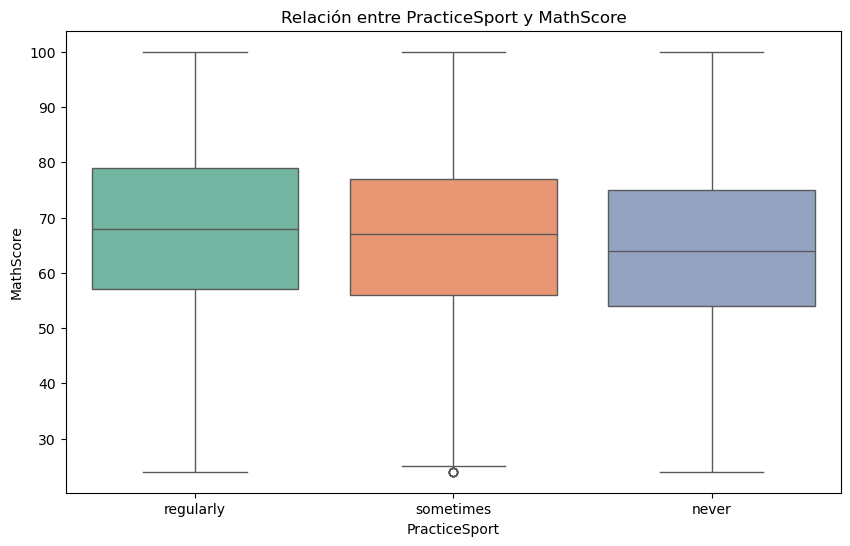

In [650]:
plt.figure(figsize=(10,6))  # Ajustar el tamaño de la figura
sns.boxplot(x=categoricals["PracticeSport"], y=numericals_final['MathScore'], palette='Set2')
plt.title('Relación entre PracticeSport y MathScore')

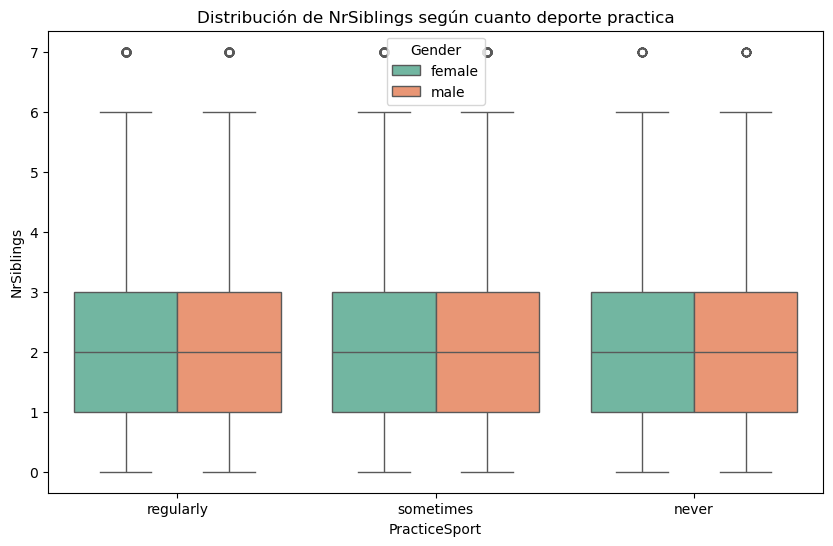

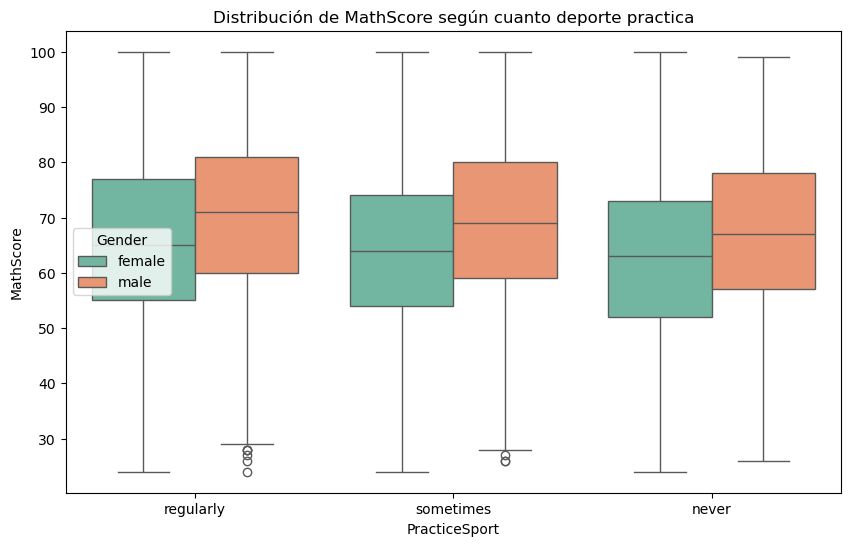

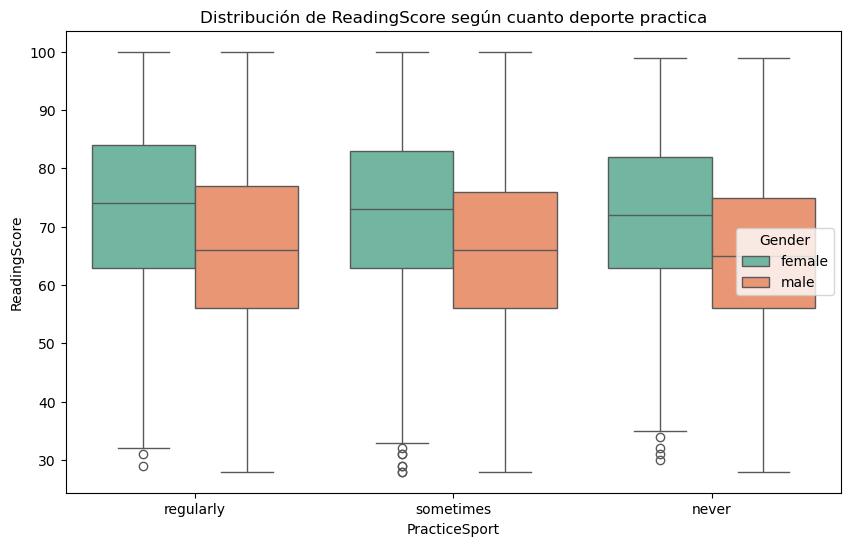

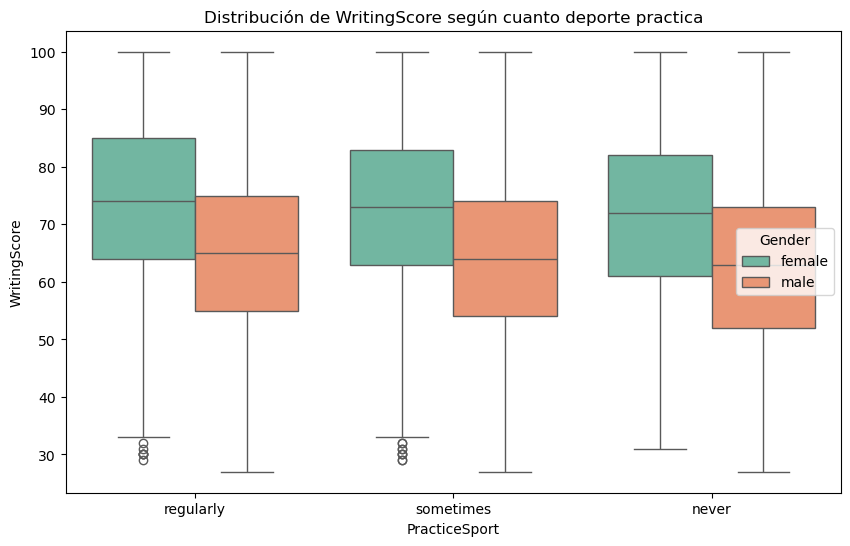

In [651]:
for i in numericals.columns:
    plt.figure(figsize=(10,6))  
    sns.boxplot(x=categoricals["PracticeSport"], y=numericals[i], hue = categoricals["Gender"], palette="Set2")
    plt.title(f"Distribución de {i} según cuanto deporte practica")

Valor p del test de chi-cuadrado: 0.06285692112188597


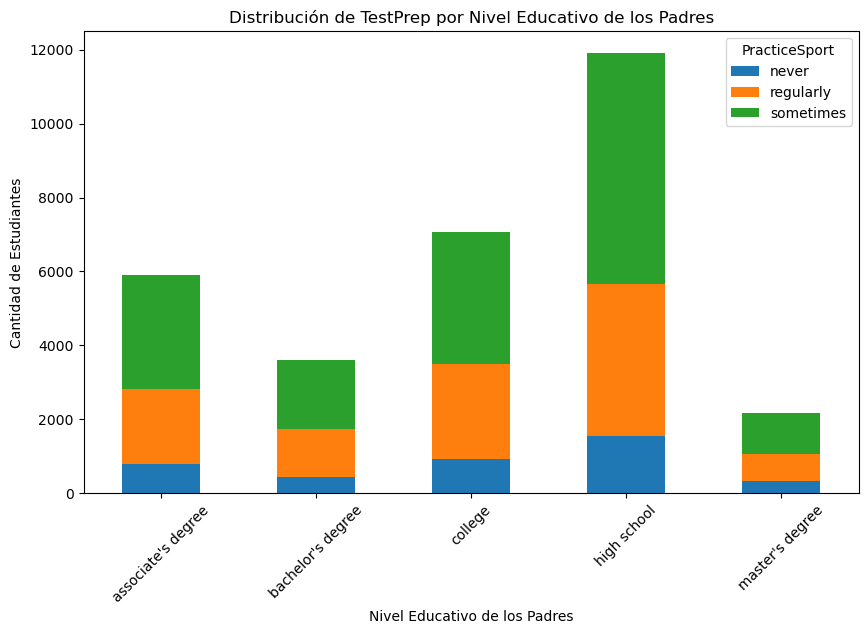

In [652]:
contingency_table = pd.crosstab(categoricals["ParentEduc"], categoricals["PracticeSport"])

# Realizar el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table) # en crosstab están los totales...

print(f"Valor p del test de chi-cuadrado: {p}")

# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Distribución de TestPrep por Nivel Educativo de los Padres')
plt.ylabel('Cantidad de Estudiantes')
plt.xlabel('Nivel Educativo de los Padres')
plt.xticks(rotation=45)
plt.show()

Valor p del test de chi-cuadrado: 0.446015248009188


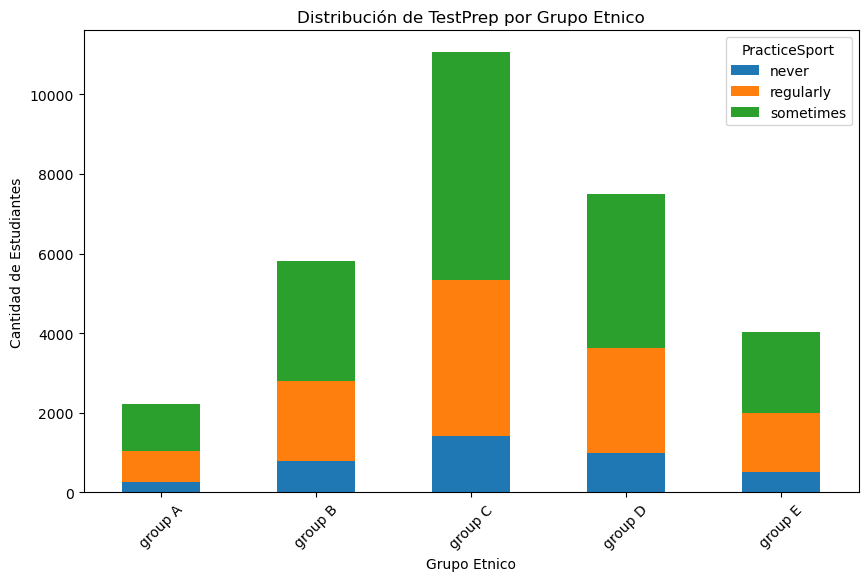

In [653]:
contingency_table = pd.crosstab(categoricals["EthnicGroup"], categoricals["PracticeSport"])

# Realizar el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table) # en crosstab están los totales...

print(f"Valor p del test de chi-cuadrado: {p}")

# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Distribución de TestPrep por Grupo Etnico')
plt.ylabel('Cantidad de Estudiantes')
plt.xlabel('Grupo Etnico')
plt.xticks(rotation=45)
plt.show()

In [654]:
# no se si quitarla

## IS FIRST CHILD

In [655]:
categoricals["IsFirstChild"].value_counts(dropna=False)

IsFirstChild
yes    19082
no     10655
NaN      904
Name: count, dtype: int64

In [656]:
categoricals.dropna(subset=["IsFirstChild"], inplace=True)

<Axes: xlabel='MathScore', ylabel='Count'>

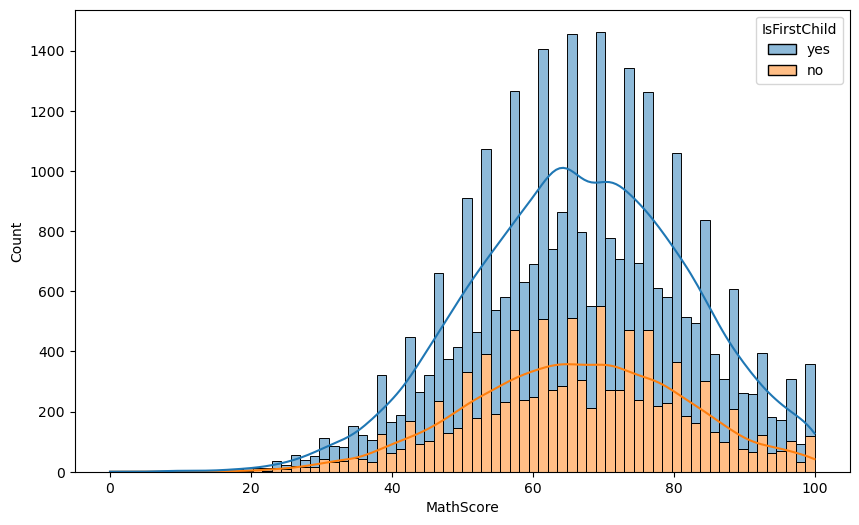

In [657]:
plt.figure(figsize=(10,6)) # tiene sentido ser el mayor en la nota de math score?
sns.histplot(data=df, x="MathScore", hue="IsFirstChild", kde=True, multiple="stack") # yo creo que no
# este grafico lo quitaría

In [658]:
avg_score = df.groupby("IsFirstChild")[["MathScore", "ReadingScore", "WritingScore"]].mean()
avg_score.sort_values(by = ["MathScore"], ascending=False)

,MathScore,ReadingScore,WritingScore
IsFirstChild,,,
yes,66.740646,69.542553,68.558484
no,66.246832,69.132614,68.210887


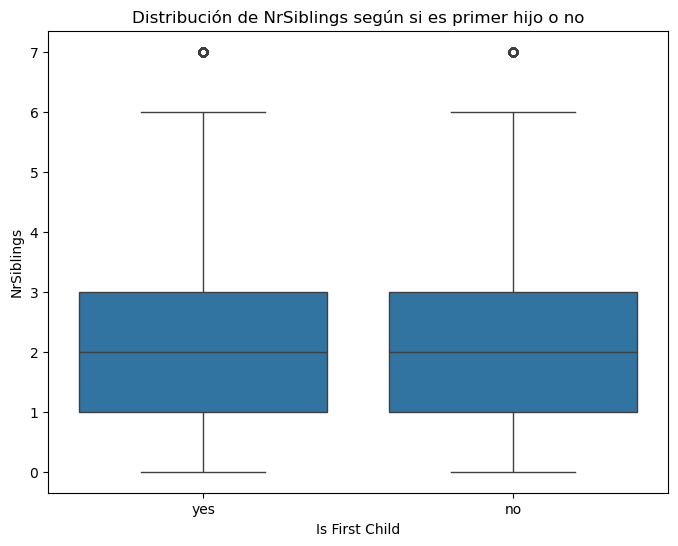

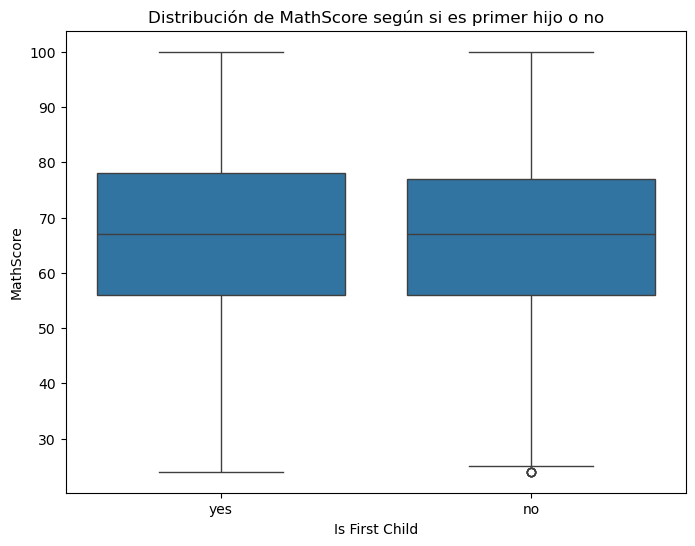

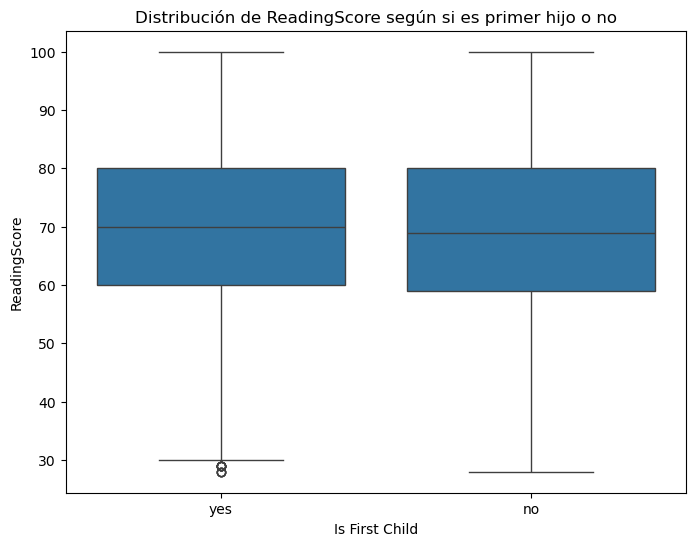

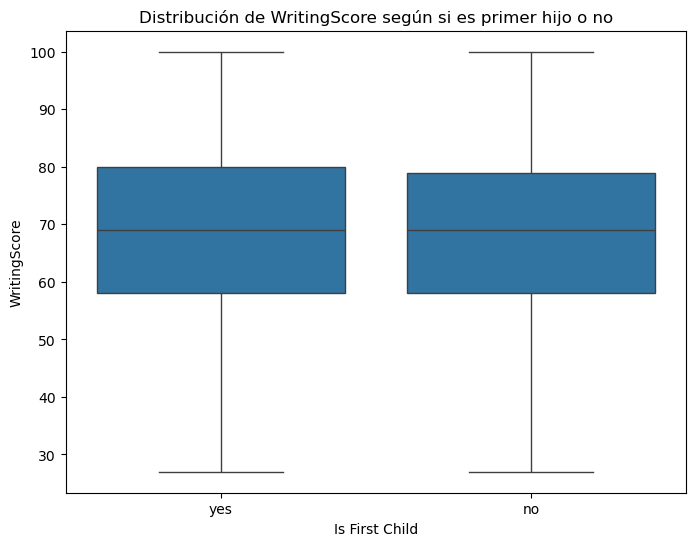

In [659]:
for i in numericals.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=categoricals["IsFirstChild"], y=numericals[i])
    plt.title(f'Distribución de {i} según si es primer hijo o no')
    plt.xlabel('Is First Child')
    plt.ylabel(i)
    plt.show()


In [660]:
# puedo eliminar la variable IS FIRST CHILD

## TRANSPORT MEANS

In [661]:
categoricals["TransportMeans"].value_counts(dropna=False)

TransportMeans
school_bus    15660
private       11031
NaN            3046
Name: count, dtype: int64

/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_4269/1687633248.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categoricals["TransportMeans"], y=numericals_final["MathScore"], palette='Set2')


<Axes: xlabel='TransportMeans', ylabel='MathScore'>

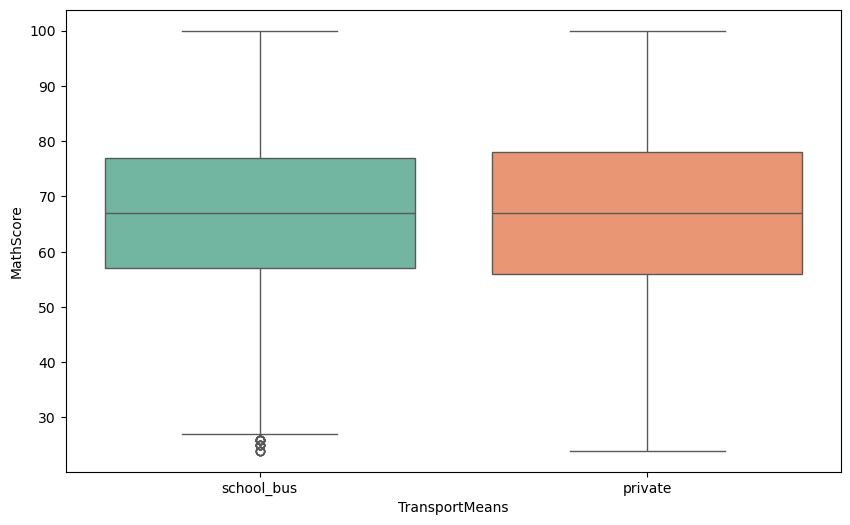

In [662]:
plt.figure(figsize=(10,6))  # Ajustar el tamaño de la figura
sns.boxplot(x=categoricals["TransportMeans"], y=numericals_final["MathScore"], palette='Set2')

In [663]:
avg_score = df.groupby("TransportMeans")[["MathScore", "ReadingScore", "WritingScore"]].mean()
avg_score.sort_values(by = ["MathScore"], ascending=False)

,MathScore,ReadingScore,WritingScore
TransportMeans,,,
school_bus,66.674636,69.446206,68.492351
private,66.511354,69.472364,68.509593


In [664]:
cross_tab = pd.crosstab(index = categoricals["ParentEduc"], columns = categoricals["TransportMeans"], margins=True, margins_name="Total")
cross_tab

TransportMeans,private,school_bus,Total
ParentEduc,,,
associate's degree,2140,3035,5175
bachelor's degree,1298,1852,3150
college,2535,3637,6172
high school,4302,6035,10337
master's degree,756,1101,1857
Total,11031,15660,26691


In [665]:
cross_tab_percentage_by_column = cross_tab.div(cross_tab.loc['Total', :], axis=1) * 100
cross_tab_percentage_by_column

TransportMeans,private,school_bus,Total
ParentEduc,,,
associate's degree,19.399873,19.380587,19.388558
bachelor's degree,11.766839,11.826309,11.801731
college,22.980691,23.224777,23.123899
high school,38.999184,38.537676,38.728410
master's degree,6.853413,7.030651,6.957401
Total,100.000000,100.000000,100.000000


In [666]:
cross_tab = pd.crosstab(index = categoricals["ParentEduc"], columns = categoricals["TransportMeans"])
cross_tab

TransportMeans,private,school_bus
ParentEduc,,
associate's degree,2140,3035
bachelor's degree,1298,1852
college,2535,3637
high school,4302,6035
master's degree,756,1101


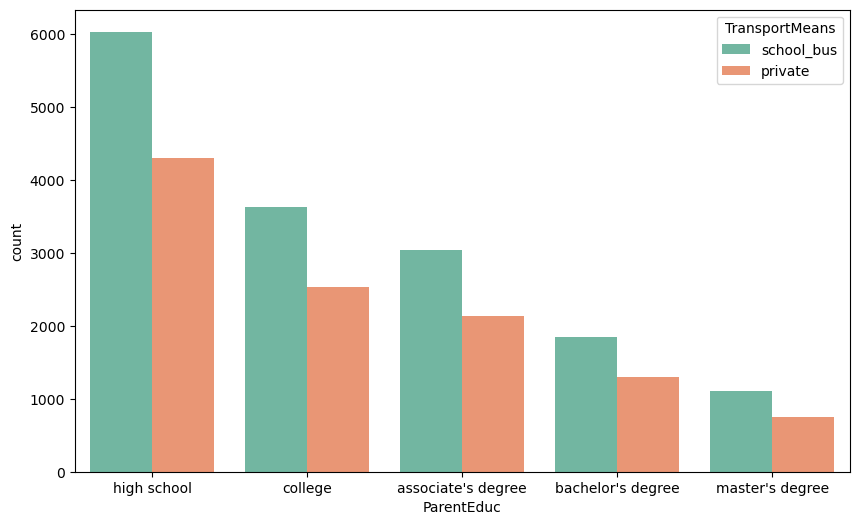

In [667]:
plt.figure(figsize = (10,6))
sns.countplot(data = categoricals, x= "ParentEduc", order = ordereduc, hue = "TransportMeans", palette="Set2")
plt.show()

In [668]:
# también la eliminaría

## WEEKLY STUDY HOURS

In [669]:
categoricals["WklyStudyHours"].value_counts(dropna=False)

WklyStudyHours
5 - 10    15792
< 5        7961
> 10       5052
NaN         932
Name: count, dtype: int64

In [670]:
# elimino los Nulls
categoricals.dropna(subset=["WklyStudyHours"], inplace=True)

In [671]:
categoricals["WklyStudyHours"].value_counts(dropna=False)

WklyStudyHours
5 - 10    15792
< 5        7961
> 10       5052
Name: count, dtype: int64

/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_4269/425819383.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categoricals["WklyStudyHours"], y=numericals[i],palette='Set2')
/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_4269/425819383.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categoricals["WklyStudyHours"], y=numericals[i],palette='Set2')
/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_4269/425819383.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categoricals["WklyStudyHours"], y=n

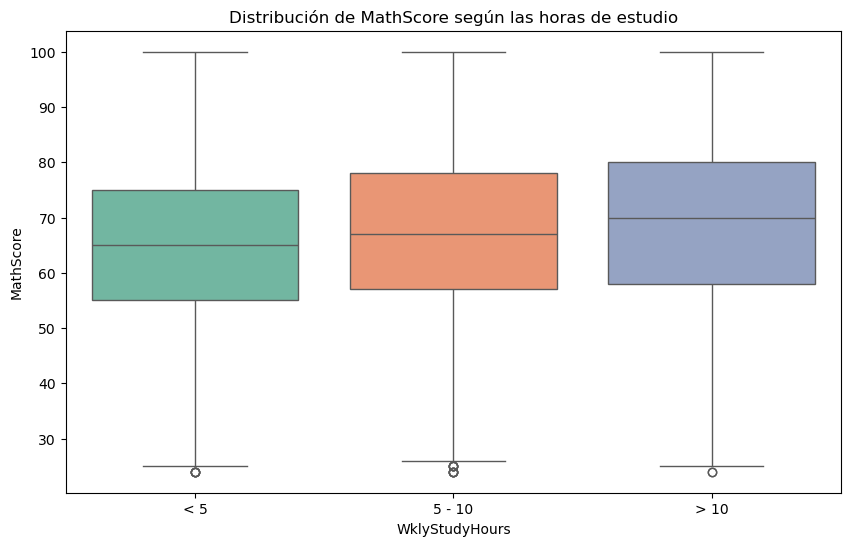

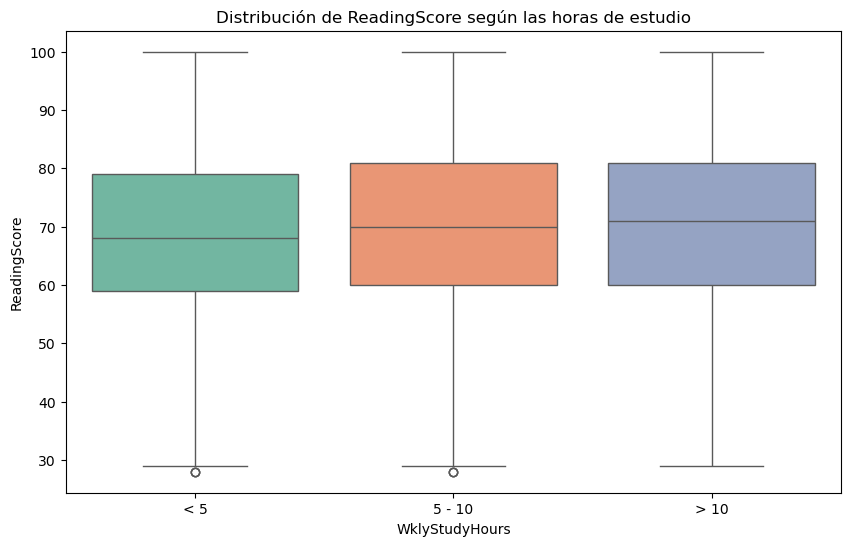

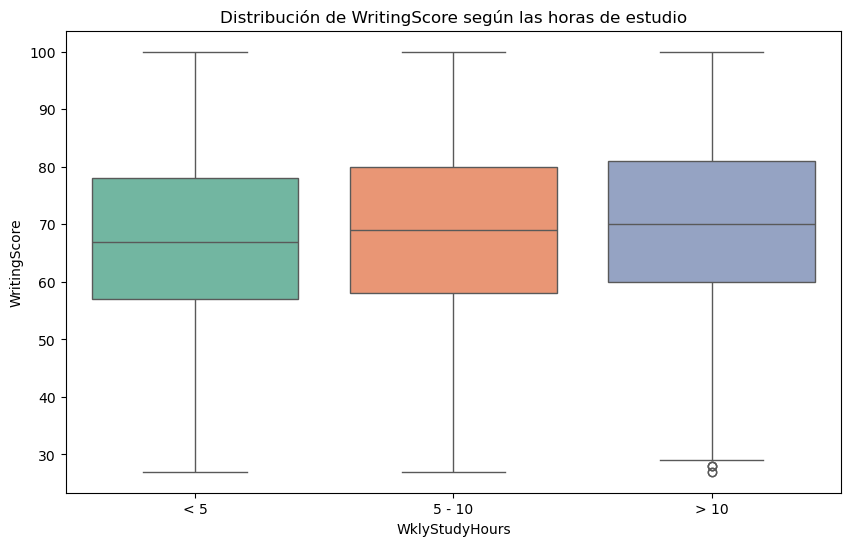

In [672]:
for i in numericals.columns:
    if i != "NrSiblings":
        plt.figure(figsize=(10,6))
        sns.boxplot(x=categoricals["WklyStudyHours"], y=numericals[i],palette='Set2')
        plt.title(f"Distribución de {i} según las horas de estudio")

In [673]:
avg_score = df.groupby("WklyStudyHours")[["MathScore", "ReadingScore", "WritingScore"]].mean()
avg_score.sort_values(by = ["MathScore"], ascending=False)

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
> 10,68.696655,70.365436,69.777778
5 - 10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192


## Transformar las variables categoricas a númericas

In [674]:
categoricals.isna().sum()

Gender                    0
EthnicGroup               0
ParentEduc                0
LunchType                 0
TestPrep                  0
ParentMaritalStatus    1121
PracticeSport             0
IsFirstChild              0
TransportMeans         2960
WklyStudyHours            0
dtype: int64

In [675]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28805 entries, 0 to 30640
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               28805 non-null  object
 1   EthnicGroup          28805 non-null  object
 2   ParentEduc           28805 non-null  object
 3   LunchType            28805 non-null  object
 4   TestPrep             28805 non-null  object
 5   ParentMaritalStatus  27684 non-null  object
 6   PracticeSport        28805 non-null  object
 7   IsFirstChild         28805 non-null  object
 8   TransportMeans       25845 non-null  object
 9   WklyStudyHours       28805 non-null  object
dtypes: object(10)
memory usage: 3.4+ MB


LABEL ENCODING PARA LAS VARIABLES ORDINALES (PARENT EDUCATION, WEEKLY STUDY HOURS Y PRACTICE SPORT) O CREO UN MAPEO MANUAL
no funciona, me las ordena en orden de aparición, voy a hacer un mapeo manual

- PARENT EDUCATION

In [676]:
categoricals["ParentEduc"]

0         bachelor's degree
1                   college
2           master's degree
3        associate's degree
4                   college
                ...        
30636           high school
30637           high school
30638           high school
30639    associate's degree
30640               college
Name: ParentEduc, Length: 28805, dtype: object

In [677]:
parent_educ= {"high school": 0, "college": 1, "associate's degree": 2, "bachelor's degree": 3, "master's degree": 4}
categoricals["ParentEduc"]= categoricals["ParentEduc"].map(parent_educ)

In [678]:
categoricals["ParentEduc"]

0        3
1        1
2        4
3        2
4        1
        ..
30636    0
30637    0
30638    0
30639    2
30640    1
Name: ParentEduc, Length: 28805, dtype: int64

- PRACTICE SPORT

In [679]:
categoricals["PracticeSport"]

0        regularly
1        sometimes
2        sometimes
3            never
4        sometimes
           ...    
30636    sometimes
30637    regularly
30638    sometimes
30639    regularly
30640        never
Name: PracticeSport, Length: 28805, dtype: object

In [680]:
ordersport = {"never": 0, "sometimes": 1, "regularly": 2}
categoricals["PracticeSport"]= categoricals["PracticeSport"].map(ordersport)

In [681]:
categoricals["PracticeSport"]

0        2
1        1
2        1
3        0
4        1
        ..
30636    1
30637    2
30638    1
30639    2
30640    0
Name: PracticeSport, Length: 28805, dtype: int64

- WEEKLY STUDY HOURS

In [682]:
categoricals["WklyStudyHours"]

0           < 5
1        5 - 10
2           < 5
3        5 - 10
4        5 - 10
          ...  
30636    5 - 10
30637    5 - 10
30638    5 - 10
30639    5 - 10
30640    5 - 10
Name: WklyStudyHours, Length: 28805, dtype: object

In [683]:
wkly_study = {"< 5": 0, "5 - 10": 1, "> 10": 2}
categoricals["WklyStudyHours"]= categoricals["WklyStudyHours"].map(wkly_study)

In [684]:
categoricals["WklyStudyHours"]

0        0
1        1
2        0
3        1
4        1
        ..
30636    1
30637    1
30638    1
30639    1
30640    1
Name: WklyStudyHours, Length: 28805, dtype: int64

GET DUMMIES PARA LAS VARIABLES NOMINALES

In [685]:
categoricals = pd.get_dummies(categoricals, columns=["Gender", "EthnicGroup", "LunchType", "TestPrep", "IsFirstChild"], drop_first=True)


In [686]:
categoricals.drop(columns= ["ParentMaritalStatus", "TransportMeans"], inplace=True, axis=1)

In [687]:
categoricals

,ParentEduc,PracticeSport,WklyStudyHours,Gender_male,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,LunchType_standard,TestPrep_none,IsFirstChild_yes
0,3,2,0,False,False,True,False,False,True,True,True
1,1,1,1,False,False,True,False,False,True,True,True
2,4,1,0,False,True,False,False,False,True,True,True
3,2,0,1,True,False,False,False,False,False,True,False
4,1,1,1,True,False,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
30636,0,1,1,False,False,False,True,False,True,True,False
30637,0,2,1,True,False,False,False,True,True,True,False
30638,0,1,1,False,False,True,False,False,False,False,False
30639,2,2,1,False,False,False,True,False,True,False,False


# CORRELACIONES

In [688]:
numericals_final

,NrSiblings,MathScore
0,3,71
1,0,69
2,4,87
3,1,45
4,0,76
...,...,...
30636,2,59
30637,1,58
30638,1,61
30639,3,82


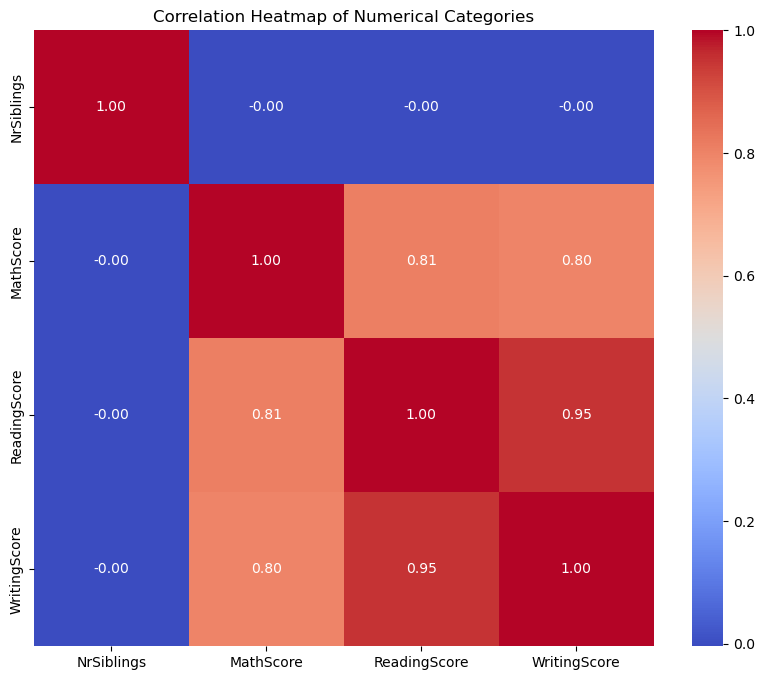

In [689]:
correlation_matrix = numericals.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Categories')
plt.show()

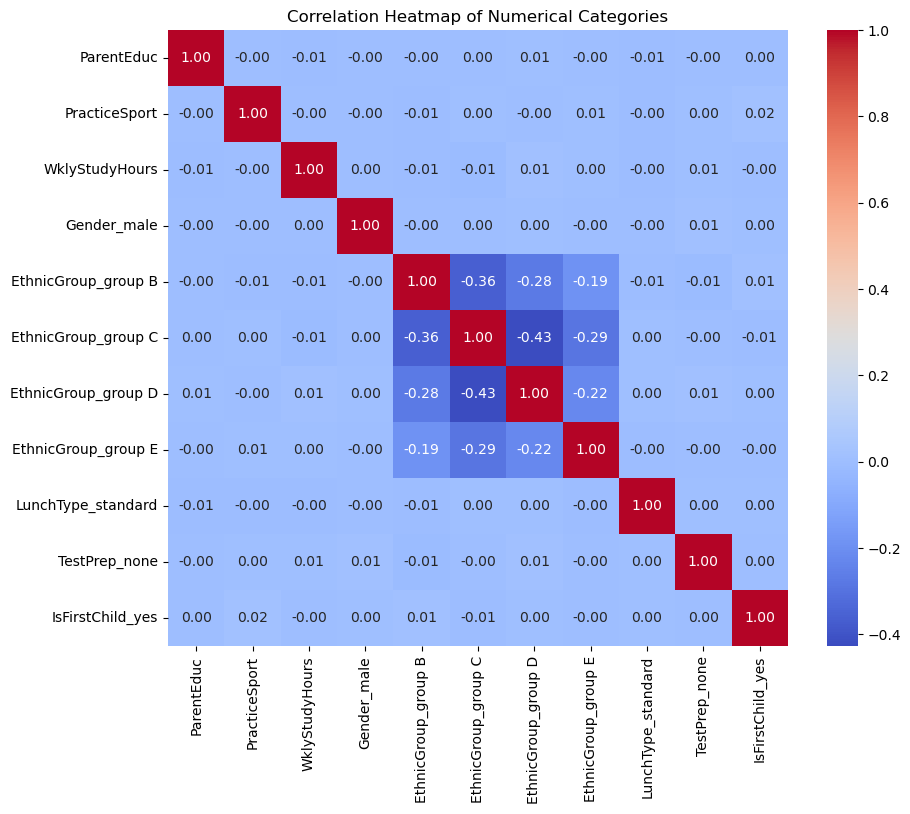

In [690]:
correlation_matrix = categoricals.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Categories')
plt.show()

In [691]:
df_final = pd.merge(numericals_final, categoricals, left_index=True, right_index=True) # SOLO ESTÁ MATHSCORE

In [692]:
df_final

,NrSiblings,MathScore,ParentEduc,PracticeSport,WklyStudyHours,Gender_male,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,LunchType_standard,TestPrep_none,IsFirstChild_yes
0,3,71,3,2,0,False,False,True,False,False,True,True,True
1,0,69,1,1,1,False,False,True,False,False,True,True,True
2,4,87,4,1,0,False,True,False,False,False,True,True,True
3,1,45,2,0,1,True,False,False,False,False,False,True,False
4,0,76,1,1,1,True,False,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,2,59,0,1,1,False,False,False,True,False,True,True,False
30637,1,58,0,2,1,True,False,False,False,True,True,True,False
30638,1,61,0,1,1,False,False,True,False,False,False,False,False
30639,3,82,2,2,1,False,False,False,True,False,True,False,False


In [693]:
df_final.to_csv("StudentsMathScoresAnalisis.csv", index=False)

In [694]:
df_final_MRWscores = pd.merge(numericals, categoricals, left_index=True, right_index=True) # ESTÁ TANTO READINGSCORE COMO WRITINGSCORE

In [695]:
df_final_MRWscores

,NrSiblings,MathScore,ReadingScore,WritingScore,ParentEduc,PracticeSport,WklyStudyHours,Gender_male,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,LunchType_standard,TestPrep_none,IsFirstChild_yes
0,3,71,71,74,3,2,0,False,False,True,False,False,True,True,True
1,0,69,90,88,1,1,1,False,False,True,False,False,True,True,True
2,4,87,93,91,4,1,0,False,True,False,False,False,True,True,True
3,1,45,56,42,2,0,1,True,False,False,False,False,False,True,False
4,0,76,78,75,1,1,1,True,False,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,2,59,61,65,0,1,1,False,False,False,True,False,True,True,False
30637,1,58,53,51,0,2,1,True,False,False,False,True,True,True,False
30638,1,61,70,67,0,1,1,False,False,True,False,False,False,False,False
30639,3,82,90,93,2,2,1,False,False,False,True,False,True,False,False


In [696]:
df_final_MRWscores.to_csv("StudentsMathReadingWritingScoresAnalisis.csv", index=False)

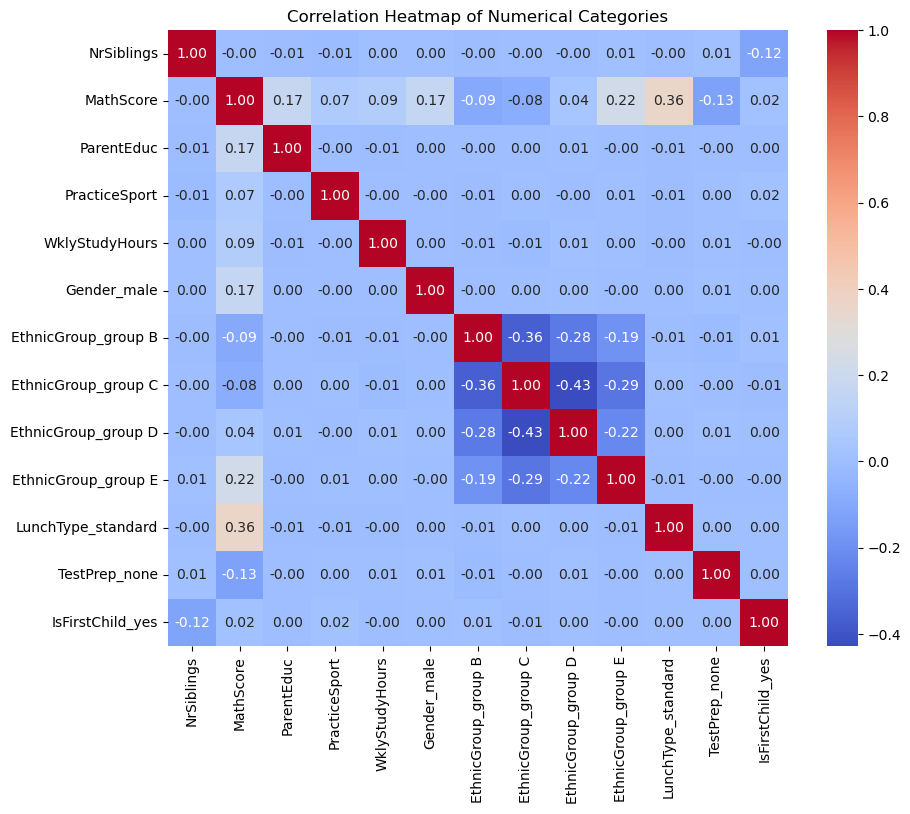

In [697]:
correlation_matrix = df_final.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Categories')
plt.show()

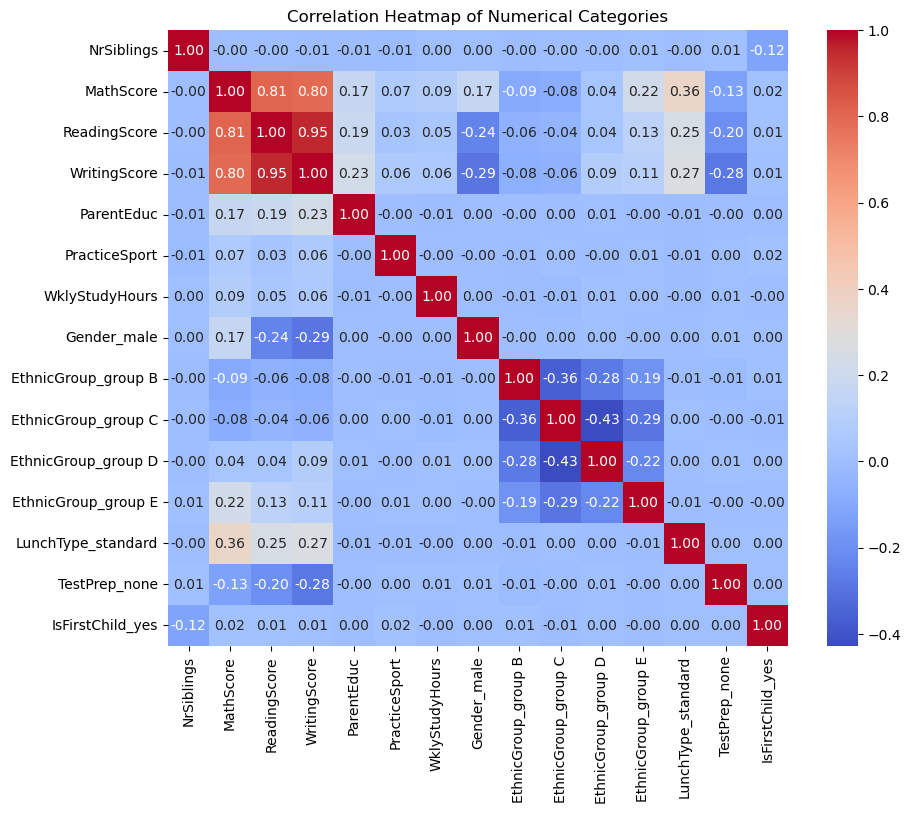

In [698]:
correlation_matrix = df_final_MRWscores.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Categories')
plt.show()

In [699]:
# cambiar el tipo de las columnas por integer
df_final[["Gender_male","EthnicGroup_group B","EthnicGroup_group C","EthnicGroup_group D","EthnicGroup_group E", "LunchType_standard", "TestPrep_none", "IsFirstChild_yes"]] = df_final[["Gender_male","EthnicGroup_group B","EthnicGroup_group C","EthnicGroup_group D","EthnicGroup_group E", "LunchType_standard", "TestPrep_none", "IsFirstChild_yes"]].astype(int)

In [700]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28561 entries, 0 to 30640
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   NrSiblings           28561 non-null  int64
 1   MathScore            28561 non-null  int64
 2   ParentEduc           28561 non-null  int64
 3   PracticeSport        28561 non-null  int64
 4   WklyStudyHours       28561 non-null  int64
 5   Gender_male          28561 non-null  int64
 6   EthnicGroup_group B  28561 non-null  int64
 7   EthnicGroup_group C  28561 non-null  int64
 8   EthnicGroup_group D  28561 non-null  int64
 9   EthnicGroup_group E  28561 non-null  int64
 10  LunchType_standard   28561 non-null  int64
 11  TestPrep_none        28561 non-null  int64
 12  IsFirstChild_yes     28561 non-null  int64
dtypes: int64(13)
memory usage: 3.1 MB


VIF

In [701]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=df_final.copy()
variables.drop(columns=["MathScore"], inplace=True) # elimino la variable objetivo
vif_data = pd.DataFrame()
vif_data["Variable"] = variables.columns
vif_data["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# Visualizamos los resultados del VIF
print(vif_data) # no hay mucha combinacion lineal entre variables
# con estas variables no vamos a tener ningún tipo de problemas (el umbral es 10 y todas son menores que 10)
# hay que mirar que no haya combinación lineal entre ninguna de las variables del modelo (incluyendo la Y)

               Variable       VIF
0            NrSiblings  2.925768
1            ParentEduc  1.901203
2         PracticeSport  3.912530
3        WklyStudyHours  2.650436
4           Gender_male  1.920846
5   EthnicGroup_group B  2.356666
6   EthnicGroup_group C  3.605564
7   EthnicGroup_group D  2.797331
8   EthnicGroup_group E  1.966992
9    LunchType_standard  2.687090
10        TestPrep_none  2.866776
11     IsFirstChild_yes  2.621633


In [702]:
# guardo el df quitando una variable sin box-cox // NUMERICALS_MW
numericals_MW = numericals.drop(columns=["ReadingScore"], axis=1)
numericals_MW.head()
df_final_MW = pd.merge(numericals_MW, categoricals, left_index=True, right_index=True) # ESTÁ SOLO EL WRITINGSCORE
# cambiar el tipo de las columnas por integer
df_final_MW[["Gender_male","EthnicGroup_group B","EthnicGroup_group C","EthnicGroup_group D","EthnicGroup_group E", "LunchType_standard", "TestPrep_none", "IsFirstChild_yes"]] = df_final[["Gender_male","EthnicGroup_group B","EthnicGroup_group C","EthnicGroup_group D","EthnicGroup_group E", "LunchType_standard", "TestPrep_none", "IsFirstChild_yes"]].astype(int)
df_final_MW.to_csv("StudentsMathWritingScoresAnalisis.csv", index=False)


In [703]:
# guardo el df haciendo el average de reading y writing score sin box-cox // NUMERICALS_AVG
numericals_avg= numericals.copy()
numericals_avg["AvgWritingReading"] = numericals[['WritingScore', 'ReadingScore']].mean(axis=1)
numericals_avg.drop(columns=["ReadingScore", "WritingScore"], inplace=True, axis=1)
df_final_avg = pd.merge(numericals_avg, categoricals, left_index=True, right_index=True) # ESTÁ EL AVERAGE DE READINGSCORE Y WRITINGSCORE
df_final_avg[["Gender_male","EthnicGroup_group B","EthnicGroup_group C","EthnicGroup_group D","EthnicGroup_group E", "LunchType_standard", "TestPrep_none", "IsFirstChild_yes"]] = df_final[["Gender_male","EthnicGroup_group B","EthnicGroup_group C","EthnicGroup_group D","EthnicGroup_group E", "LunchType_standard", "TestPrep_none", "IsFirstChild_yes"]].astype(int)
df_final_avg.to_csv("StudentsMathandAVGScoresAnalisis.csv", index=False)